### Binary & Categorical EDA

This notebook contains exploratory data analysis done primarily on binary and categorical columns

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [3]:
df = pd.read_csv('../data/fake_job_postings.csv')

display(df.head())

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Binary columns


Proportion of 1 in each binary feature by class:
                telecommuting  has_company_logo  has_questions
fraudulent                                                    
Non-fraudulent       0.041319          0.819149       0.502057
Fraudulent           0.073903          0.326790       0.288684


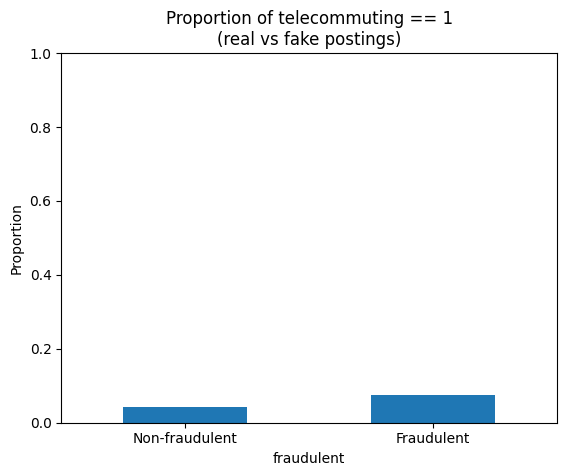

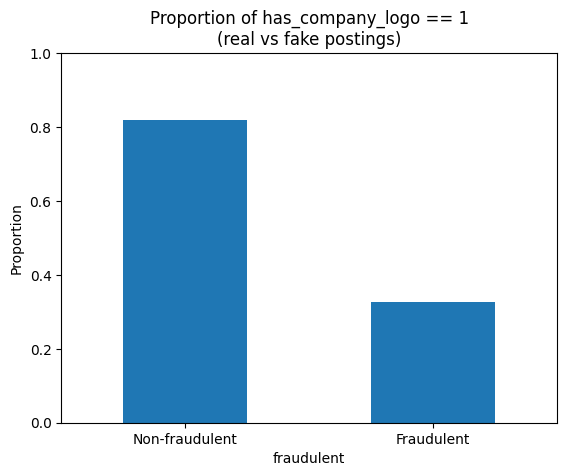

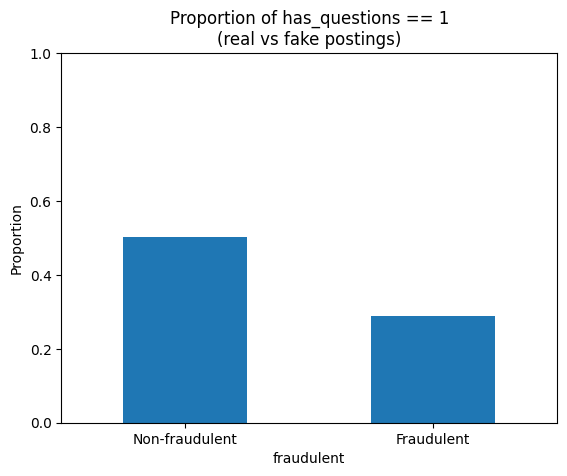

In [5]:
# list out binary cols
binary_cols = ["telecommuting", "has_company_logo", "has_questions"]

# calculate the mean of the binary columns for fraudulent and non-fraudulent jobs
fraud_group_proportions = (
    df.groupby('fraudulent')[binary_cols].mean()
    .rename(index={0: 'Non-fraudulent', 1: 'Fraudulent'})
)

print('\nProportion of 1 in each binary feature by class:')
print(fraud_group_proportions)

# plot bar chart for each feature
for col in binary_cols:
    plt.figure()
    vals = fraud_group_proportions[col]
    vals.plot(kind="bar")
    plt.title(f"Proportion of {col} == 1\n(real vs fake postings)")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.show()

Exploring the creation of interaction features from the binary columns

In [6]:
df["no_logo"] = 1 - df["has_company_logo"]
df["no_questions"] = 1 - df["has_questions"]

# potential interaction features
df["no_logo__no_questions"] = (df["no_logo"] & df["no_questions"]).astype(int)
df["telecommute__no_logo"] = ((df["telecommuting"]==1) & (df["has_company_logo"]==0)).astype(int)

combo_cols = ["no_logo__no_questions", "telecommute__no_logo"]

for col in combo_cols:
    print(f"\n=== {col} ===")
    print(
        df.groupby(col)["fraudulent"]
            .mean()
            .to_frame(name="fraud_rate")
            .join(
                df[col].value_counts().to_frame(name="count")
            )
    )



=== no_logo__no_questions ===
                       fraud_rate  count
no_logo__no_questions                   
0                        0.024776  15176
1                        0.181213   2704

=== telecommute__no_logo ===
                      fraud_rate  count
telecommute__no_logo                   
0                       0.046513  17694
1                       0.231183    186


Categorical columns

title
English Teacher Abroad                                0.017394
Customer Service Associate                            0.008166
Graduates: English Teacher Abroad (Conversational)    0.008054
English Teacher Abroad                                0.005313
Software Engineer                                     0.004810
English Teacher Abroad (Conversational)               0.004642
Customer Service Associate - Part Time                0.004251
Account Manager                                       0.004195
Web Developer                                         0.003691
Project Manager                                       0.003468
Name: proportion, dtype: float64

location
GB, LND, London          0.040949
US, NY, New York         0.037527
US, CA, San Francisco    0.026919
GR, I, Athens            0.026463
US, ,                    0.019334
US, TX, Houston          0.015342
US, IL, Chicago          0.014543
US, DC, Washington       0.014315
DE, BE, Berlin           0.012604
NZ, N, Auckland          0.012433
Name: proportion, dtype: float64

department
Sales                     0.087005
Engineering               0.076899
Marketing                 0.063319
Operations                0.042634
IT                        0.035528
Development               0.023054
Product                   0.017685
Information Technology    0.013580
Design                    0.012001
Technology                0.012001
Name: proportion, dtype: float64

employment_type
Full-time    0.806440
Contract     0.105767
Part-time    0.055313
Temporary    0.016726
Other        0.015754
Name: proportion, dtype: float64

required_experience
Mid-Senior level    0.351708
Entry level         0.249030
Associate           0.212096
Not Applicable      0.103047
Director            0.035919
Internship          0.035180
Executive           0.013019
Name: proportion, dtype: float64

required_education
Bachelor's Degree                    0.526343
High School or equivalent            0.212788
Unspecified                          0.142916
Master's Degree                      0.042558
Associate Degree                     0.028031
Certification                        0.017391
Some College Coursework Completed    0.010435
Professional                         0.007570
Vocational                           0.005013
Some High School Coursework          0.002762
Name: proportion, dtype: float64

industry
Information Technology and Services    0.133621
Computer Software                      0.106034
Internet                               0.081837
Marketing and Advertising              0.063805
Education Management                   0.063343
Financial Services                     0.060029
Hospital & Health Care                 0.038299
Consumer Services                      0.027587
Telecommunications                     0.026354
Oil & Energy                           0.022116
Name: proportion, dtype: float64

function
Information Technology    0.153085
Sales                     0.128490
Engineering               0.117987
Customer Service          0.107571
Marketing                 0.072648
Administrative            0.055142
Design                    0.029759
Health Care Provider      0.029584
Other                     0.028446
Education                 0.028446
Name: proportion, dtype: float64

<Axes: xlabel='function', ylabel='count'>

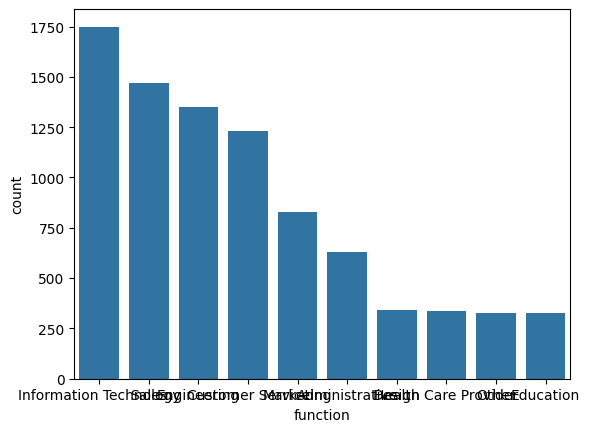

In [7]:
categorical_cols = [
    'title',
    'location',
    'department',
    'employment_type',
    'required_experience',
    'required_education',
    'industry',
    'function'
]
#freq distribution
for col in categorical_cols:
    display(df[col].value_counts(normalize=True).head(10))
sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])

/var/folders/ks/1vwfb61d70zg88p9htntfxlw0000gn/T/ipykernel_89726/4074302747.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


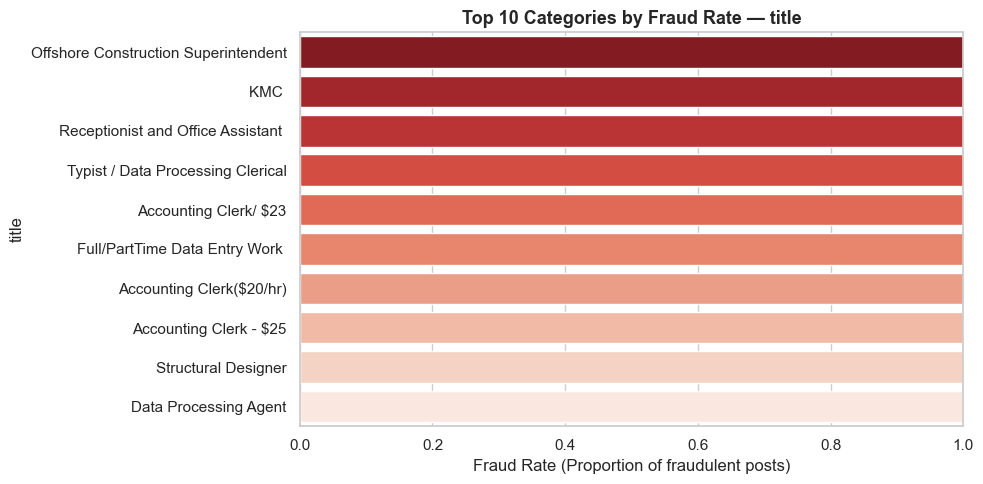

/var/folders/ks/1vwfb61d70zg88p9htntfxlw0000gn/T/ipykernel_89726/4074302747.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


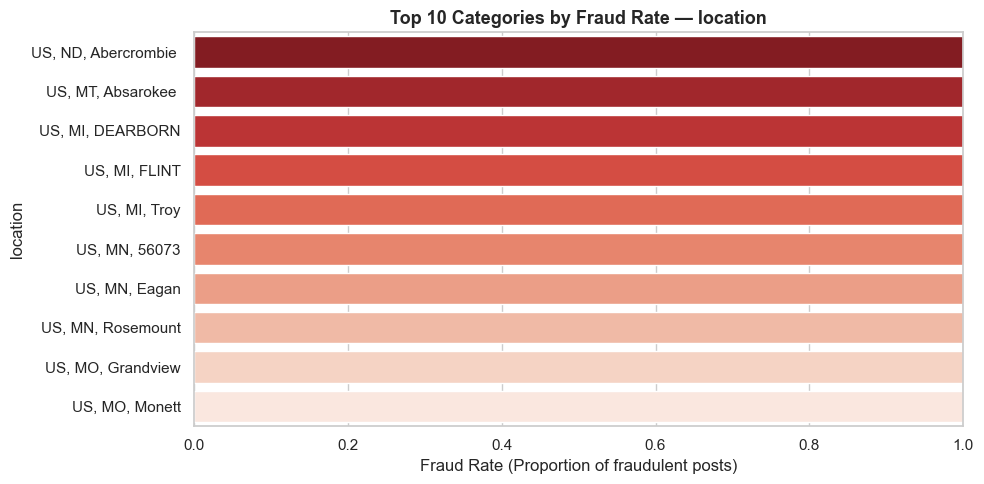

/var/folders/ks/1vwfb61d70zg88p9htntfxlw0000gn/T/ipykernel_89726/4074302747.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


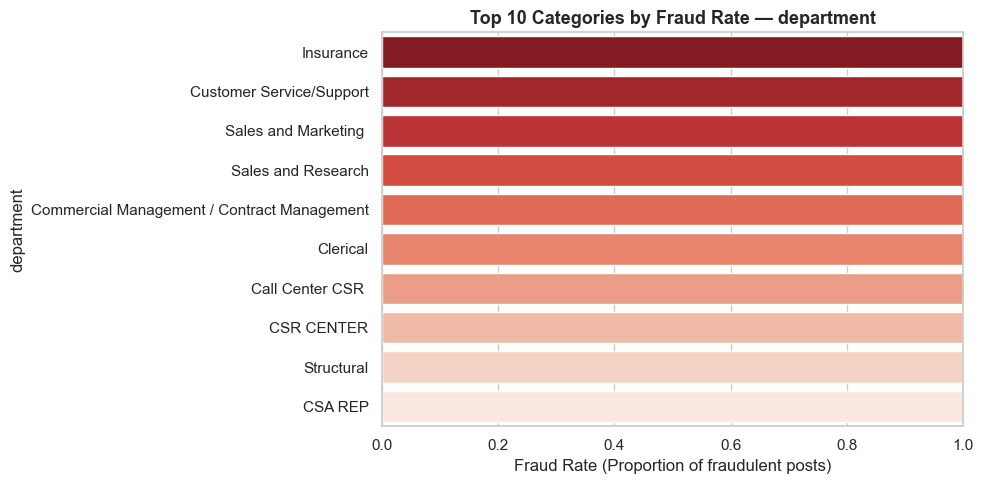

/var/folders/ks/1vwfb61d70zg88p9htntfxlw0000gn/T/ipykernel_89726/4074302747.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


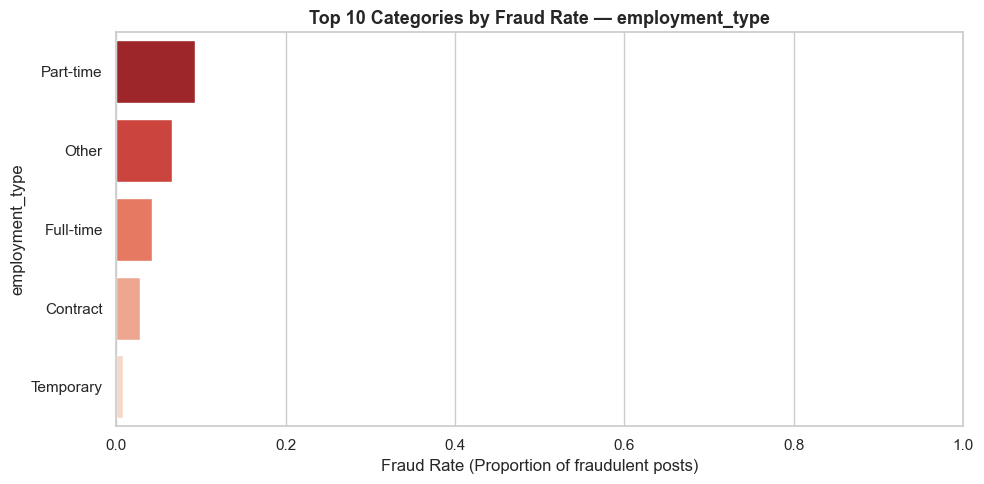

/var/folders/ks/1vwfb61d70zg88p9htntfxlw0000gn/T/ipykernel_89726/4074302747.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


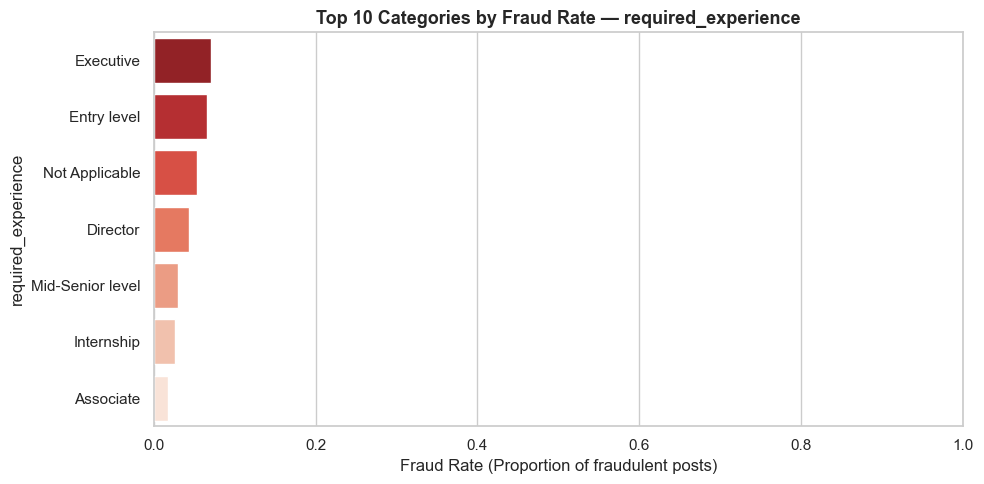

/var/folders/ks/1vwfb61d70zg88p9htntfxlw0000gn/T/ipykernel_89726/4074302747.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


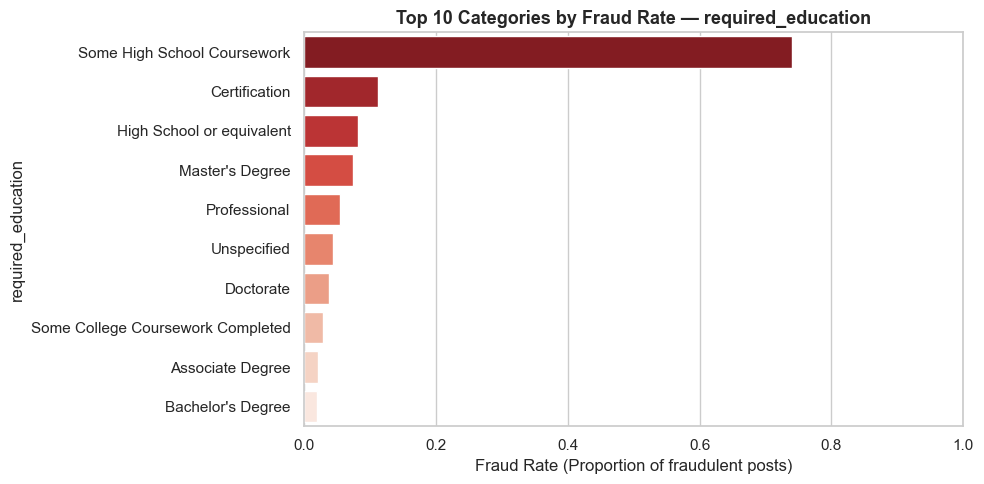

/var/folders/ks/1vwfb61d70zg88p9htntfxlw0000gn/T/ipykernel_89726/4074302747.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


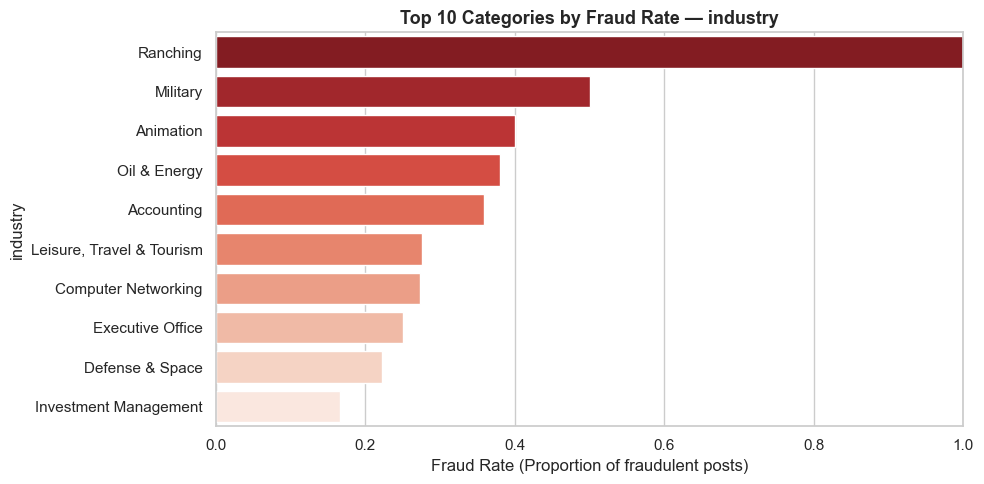

/var/folders/ks/1vwfb61d70zg88p9htntfxlw0000gn/T/ipykernel_89726/4074302747.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


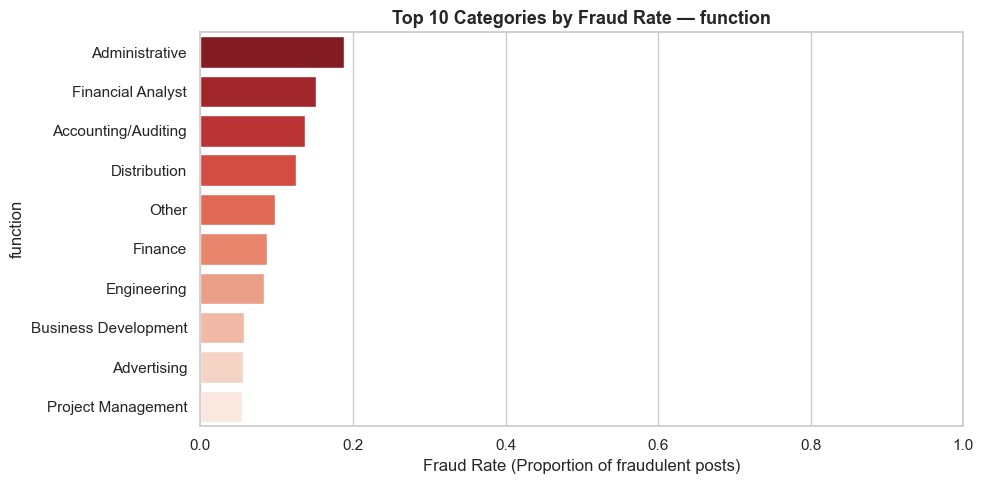

In [8]:
# plot fraud rate for each categorical feature, and show top 10 within each category
sns.set(style="whitegrid")

for col in categorical_cols:
    plt.figure(figsize=(10,5))

    fraud_rate = (
        df.groupby(col)['fraudulent']
        .mean()
        .sort_values(ascending=False)
        .head(10)   # show only top 10
        .reset_index()
    )

    # Barplot
    sns.barplot(
        data=fraud_rate,
        x='fraudulent',
        y=col,
        palette='Reds_r'
    )

    plt.title(f"Top 10 Categories by Fraud Rate — {col}", fontsize=13, weight='bold')
    plt.xlabel("Fraud Rate (Proportion of fraudulent posts)")
    plt.ylabel(col)
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

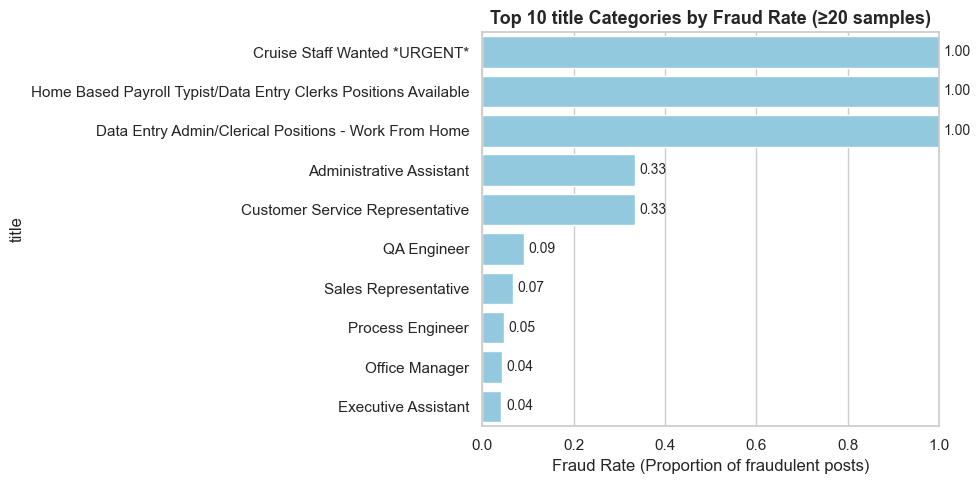

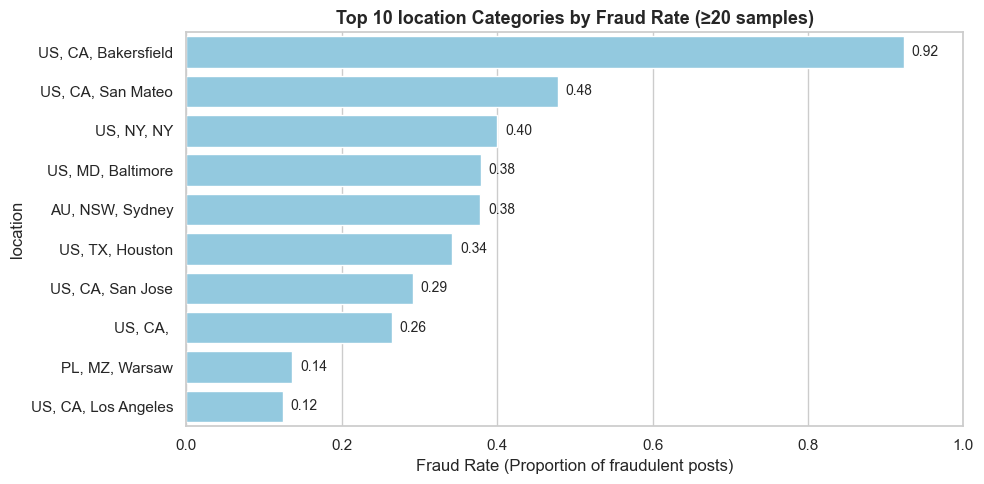

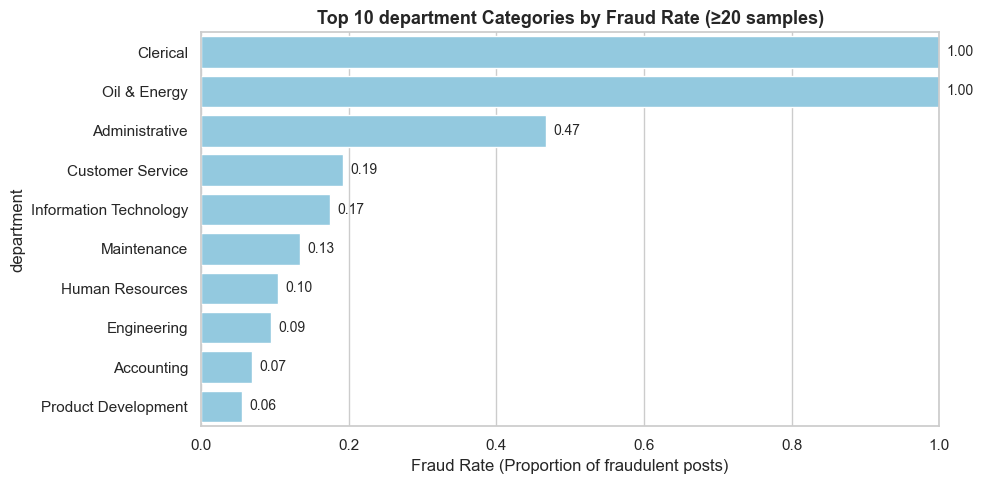

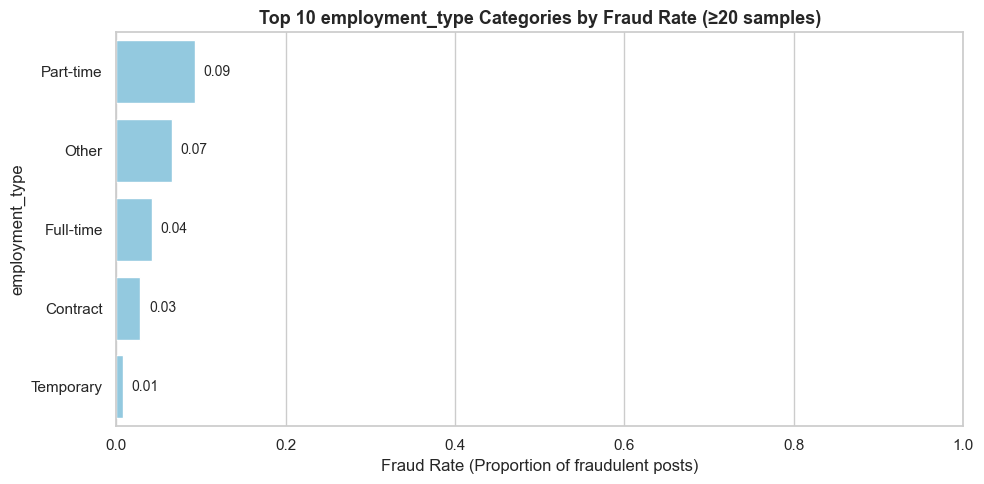

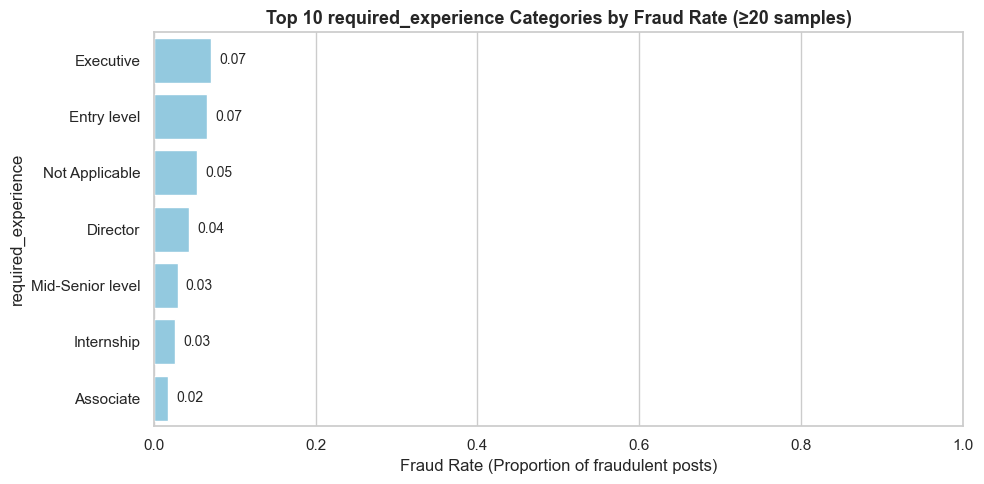

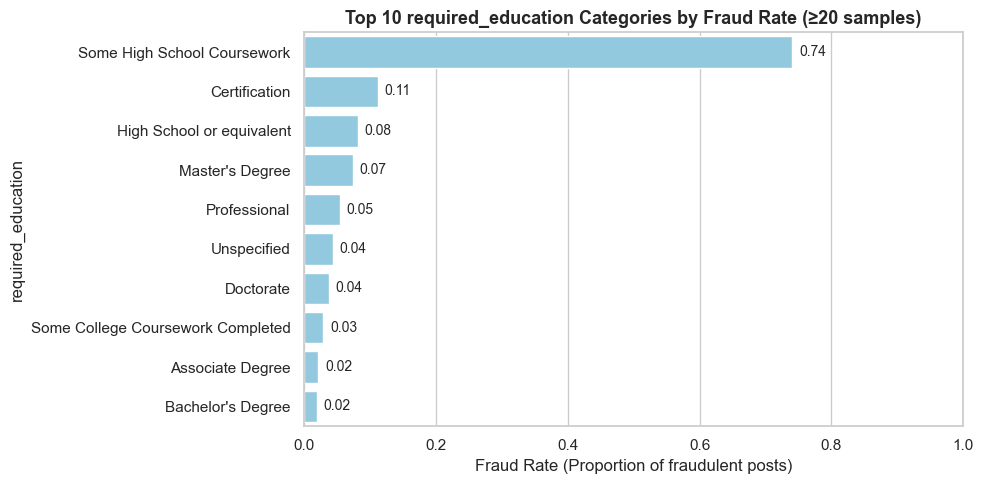

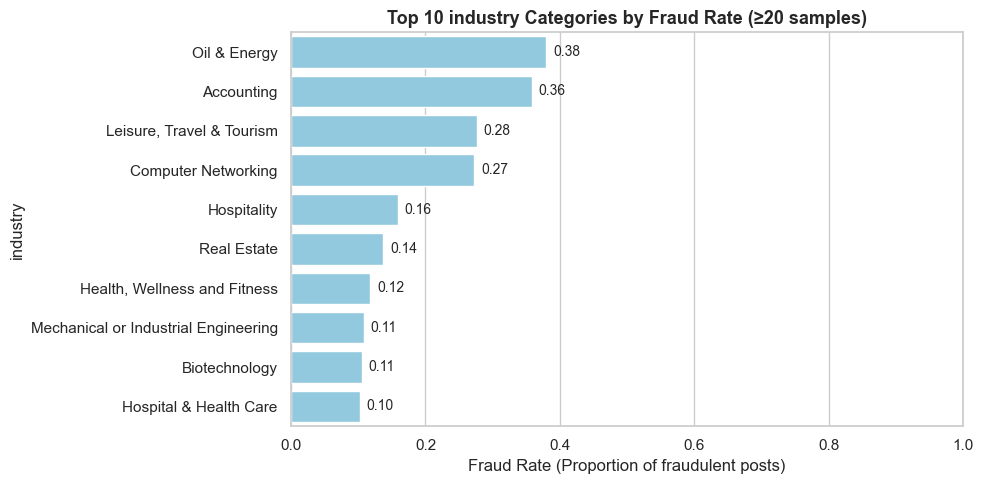

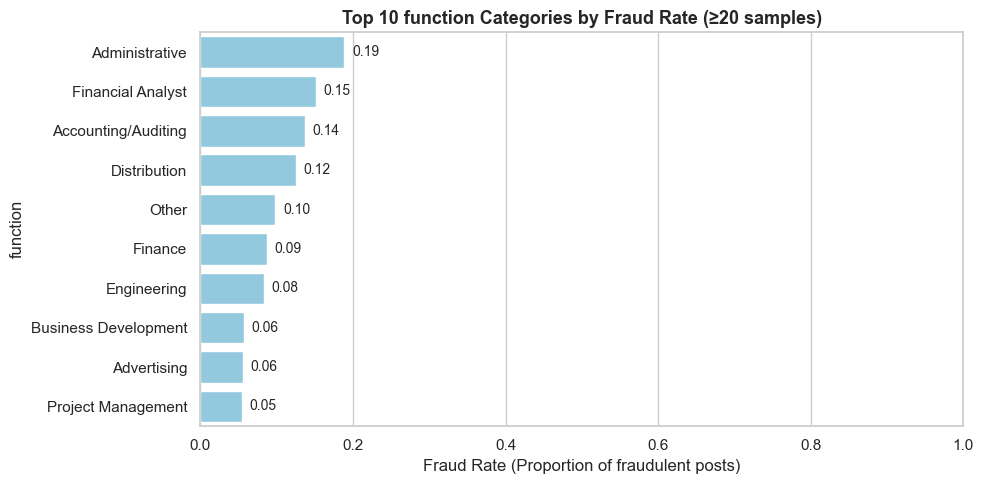

In [10]:
# experiment with fraud rate vs counts within each category, and keep only categories with >= 20 samples
for col in categorical_cols:
    plt.figure(figsize=(10,5))

    # compute fraud rate + counts
    stats = (
        df.groupby(col)['fraudulent']
        .agg(['mean', 'count'])
        .sort_values('mean', ascending=False)
        .reset_index()
    )

    # keep only categories with enough occurrences (e.g., >= 20)
    stats = stats[stats['count'] >= 20]

    # select top 10 by fraud rate
    top = stats.head(10)

    sns.barplot(data=top, x='mean', y=col, color='skyblue')

    # add numeric labels
    for index, value in enumerate(top['mean']):
        plt.text(value + 0.01, index, f"{value:.2f}", va='center', fontsize=10)

    plt.title(f"Top 10 {col} Categories by Fraud Rate (≥20 samples)", fontsize=13, weight='bold')
    plt.xlabel("Fraud Rate (Proportion of fraudulent posts)")
    plt.ylabel(col)
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

In [12]:
# compute overall fraud stats for each categorical column with row threshold

cat_cols = [
    "industry",
    "function",
    "employment_type",
    "required_experience",
    "required_education",
    "department",
    "location"  # high cardinality but we'll still compute
]

def fraud_stats_for_column(df, col, min_rows=30):
    # skip column if it's missing
    if col not in df.columns:
        return None

    stats = (
        df.groupby(col)["fraudulent"]
          .agg(["mean", "count", "sum"])
          .rename(columns={
              "mean": "fraud_rate",
              "count": "num_rows",
              "sum": "num_fraud_posts"
          })
    )

    # apply the minimum row threshold
    stats_filtered = (
        stats[stats["num_rows"] >= min_rows]
        .sort_values(by="fraud_rate", ascending=False)
    )

    return stats_filtered

fraud_stats_by_column = {}

for col in cat_cols:
    stats_filtered = fraud_stats_for_column(df, col, min_rows=30)
    fraud_stats_by_column[col] = stats_filtered

print("=== industry ===")
print(fraud_stats_by_column["industry"])

print("\n=== function ===")
print(fraud_stats_by_column["function"])

print("\n=== employment_type ===")
print(fraud_stats_by_column["employment_type"])

print("\n=== required_experience ===")
print(fraud_stats_by_column["required_experience"])

print("\n=== required_education ===")
print(fraud_stats_by_column["required_education"])

print("\n=== department ===")
print(fraud_stats_by_column["department"])

print("\n=== location ===")
print(fraud_stats_by_column["location"])


=== industry ===
                           fraud_rate  num_rows  num_fraud_posts
industry                                                        
Oil & Energy                 0.379791       287              109
Accounting                   0.358491       159               57
Leisure, Travel & Tourism    0.276316        76               21
Computer Networking          0.272727        44               12
Hospitality                  0.159091        88               14
...                               ...       ...              ...
Printing                     0.000000        30                0
Pharmaceuticals              0.000000        42                0
Internet                     0.000000      1062                0
Education Management         0.000000       822                0
Food & Beverages             0.000000        72                0

[64 rows x 3 columns]

=== function ===
                        fraud_rate  num_rows  num_fraud_posts
function                           

Finding out more about correlations between categorical columns and target variable

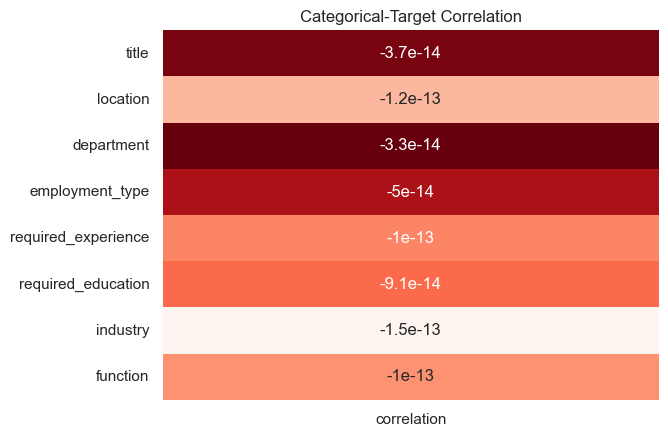

In [ ]:
from sklearn.preprocessing import LabelEncoder

def correlation_ratio(categories, measurements):
    # convert categories to numeric codes
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    # calculate overall mean of measurements
    y_avg = np.mean(measurements)
    # sum of weighted squared deviations within each category
    numerator = sum(np.bincount(fcat, weights=(measurements - y_avg)**2))
    # total sum of squared deviations
    denominator = sum((measurements - y_avg)**2)
    # return eta coefficient (1 - within-group variance / total variance)
    return 1 - numerator / denominator if denominator != 0 else 0

corrs = {}
for col in categorical_cols:
    corrs[col] = correlation_ratio(df[col].astype(str), df['fraudulent'])

corr_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['correlation'])
sns.heatmap(corr_df, annot=True, cmap='Reds', cbar=False)
plt.title("Categorical-Target Correlation")
plt.show()

Experimenting relationship of industry and employment type with target variable

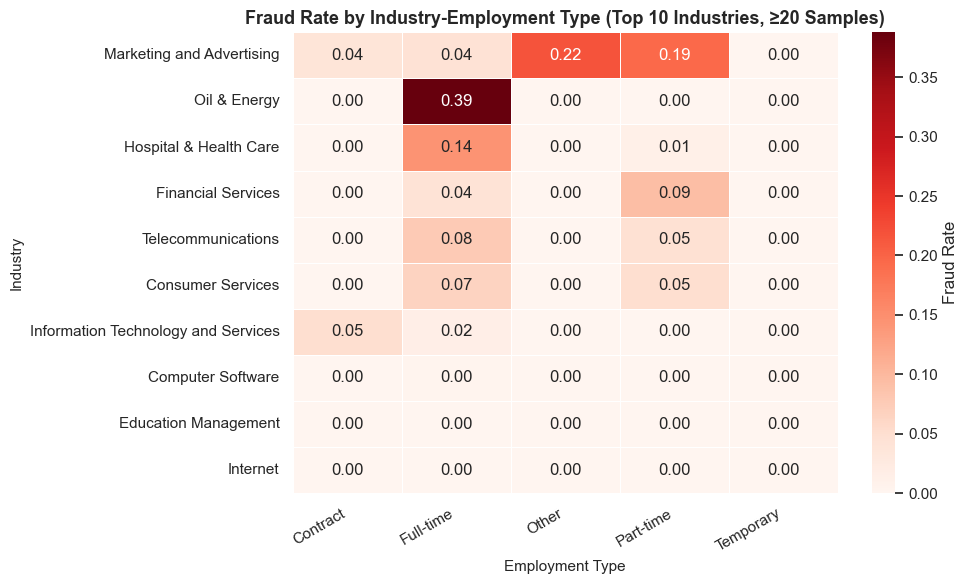

In [14]:
# compute fraud rate + total count for each industry–employment_type combination
cross_data = (
    df.groupby(['industry', 'employment_type'])['fraudulent']
    .agg(['mean', 'count'])
    .reset_index()
)

# filter out categories with fewer than 20 total postings
cross_data = cross_data[cross_data['count'] >= 20]

# compute total job count per industry (for ranking)
industry_totals = df.groupby('industry')['fraudulent'].count().sort_values(ascending=False)

# select only top 10 industries by posting volume
top_10_industries = industry_totals.head(10).index

cross_data = cross_data[cross_data['industry'].isin(top_10_industries)]

# pivot for heatmap
cross_pivot = cross_data.pivot(index='industry', columns='employment_type', values='mean').fillna(0)

# sort industries by overall fraud rate (average across employment types)
cross_pivot['avg_fraud'] = cross_pivot.mean(axis=1)
cross_pivot = cross_pivot.sort_values('avg_fraud', ascending=False).drop(columns='avg_fraud')

# plot
plt.figure(figsize=(10,6))
sns.heatmap(
    cross_pivot,
    cmap="Reds",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Fraud Rate'}
)

plt.title("Fraud Rate by Industry-Employment Type (Top 10 Industries, ≥20 Samples)", fontsize=13, weight='bold')
plt.xlabel("Employment Type", fontsize=11)
plt.ylabel("Industry", fontsize=11)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Experimenting relationship of education and experience type with target variable

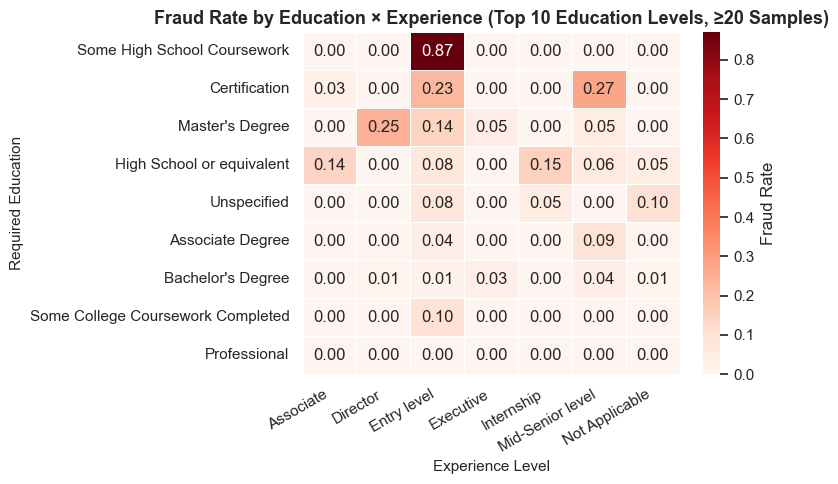

In [15]:
# compute fraud rate and total count for each education–experience combination
edu_exp_data = (
    df.groupby(['required_education', 'required_experience'])['fraudulent']
    .agg(['mean', 'count'])
    .reset_index()
)

# filter out rare combinations (less than 20 total samples)
edu_exp_data = edu_exp_data[edu_exp_data['count'] >= 20]

# find the top 10 education categories by total posting volume
edu_totals = df.groupby('required_education')['fraudulent'].count().sort_values(ascending=False)
top_10_edu = edu_totals.head(10).index

edu_exp_data = edu_exp_data[edu_exp_data['required_education'].isin(top_10_edu)]

# pivot for heatmap
edu_exp_pivot = edu_exp_data.pivot(
    index='required_education',
    columns='required_experience',
    values='mean'
).fillna(0)

# sort education levels by average fraud rate (descending)
edu_exp_pivot['avg_fraud'] = edu_exp_pivot.mean(axis=1)
edu_exp_pivot = edu_exp_pivot.sort_values('avg_fraud', ascending=False).drop(columns='avg_fraud')

# plot
plt.figure(figsize=(8,5))
sns.heatmap(
    edu_exp_pivot,
    cmap="Reds",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Fraud Rate'}
)

plt.title("Fraud Rate by Education × Experience (Top 10 Education Levels, ≥20 Samples)", fontsize=13, weight='bold')
plt.xlabel("Experience Level", fontsize=11)
plt.ylabel("Required Education", fontsize=11)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

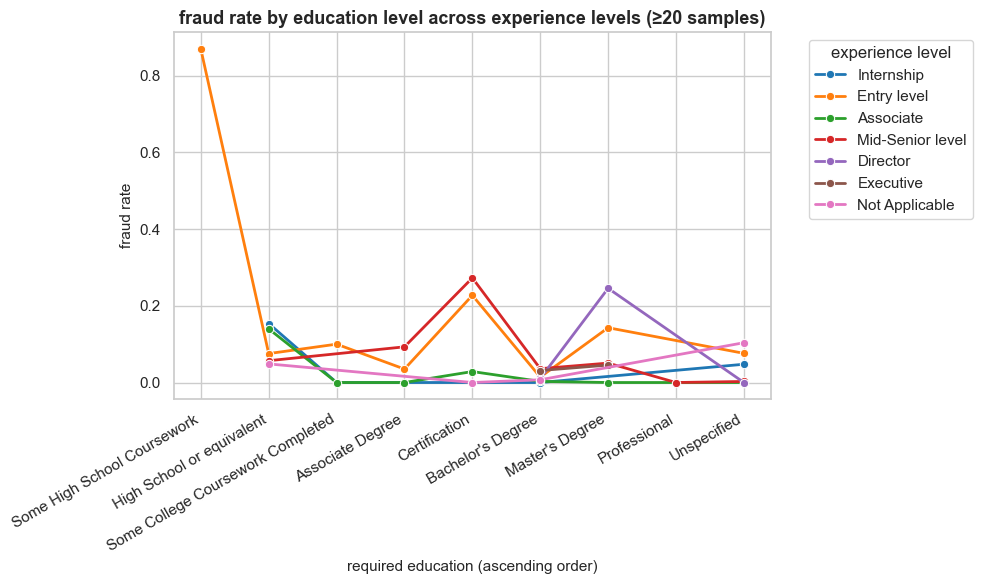

In [16]:
# compute fraud rate for each education–experience pair
edu_exp_data = (
    df.groupby(['required_education', 'required_experience'])['fraudulent']
    .agg(['mean', 'count'])
    .reset_index()
)

# filter only statistically meaningful groups (≥20 samples)
edu_exp_data = edu_exp_data[edu_exp_data['count'] >= 20]

# define logical ascending orders for both axes
education_order = [
    'Some High School Coursework',
    'High School or equivalent',
    'Some College Coursework Completed',
    'Associate Degree',
    'Certification',
    "Bachelor's Degree",
    "Master's Degree",
    'Professional',
    'Unspecified'
]

experience_order = [
    'Internship',
    'Entry level',
    'Associate',
    'Mid-Senior level',
    'Director',
    'Executive',
    'Not Applicable'
]

# ensure consistent order and remove missing categories
edu_exp_data = edu_exp_data[
    edu_exp_data['required_education'].isin(education_order) &
    edu_exp_data['required_experience'].isin(experience_order)
]

edu_exp_data['required_education'] = pd.Categorical(
    edu_exp_data['required_education'], categories=education_order, ordered=True
)
edu_exp_data['required_experience'] = pd.Categorical(
    edu_exp_data['required_experience'], categories=experience_order, ordered=True
)

# plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(
    data=edu_exp_data,
    x='required_education',
    y='mean',
    hue='required_experience',
    marker='o',
    linewidth=2,
    palette='tab10'
)

# formatting
plt.title("fraud rate by education level across experience levels (≥20 samples)", fontsize=13, weight='bold')
plt.xlabel("required education (ascending order)", fontsize=11)
plt.ylabel("fraud rate", fontsize=11)
plt.xticks(rotation=30, ha='right')
plt.legend(title="experience level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

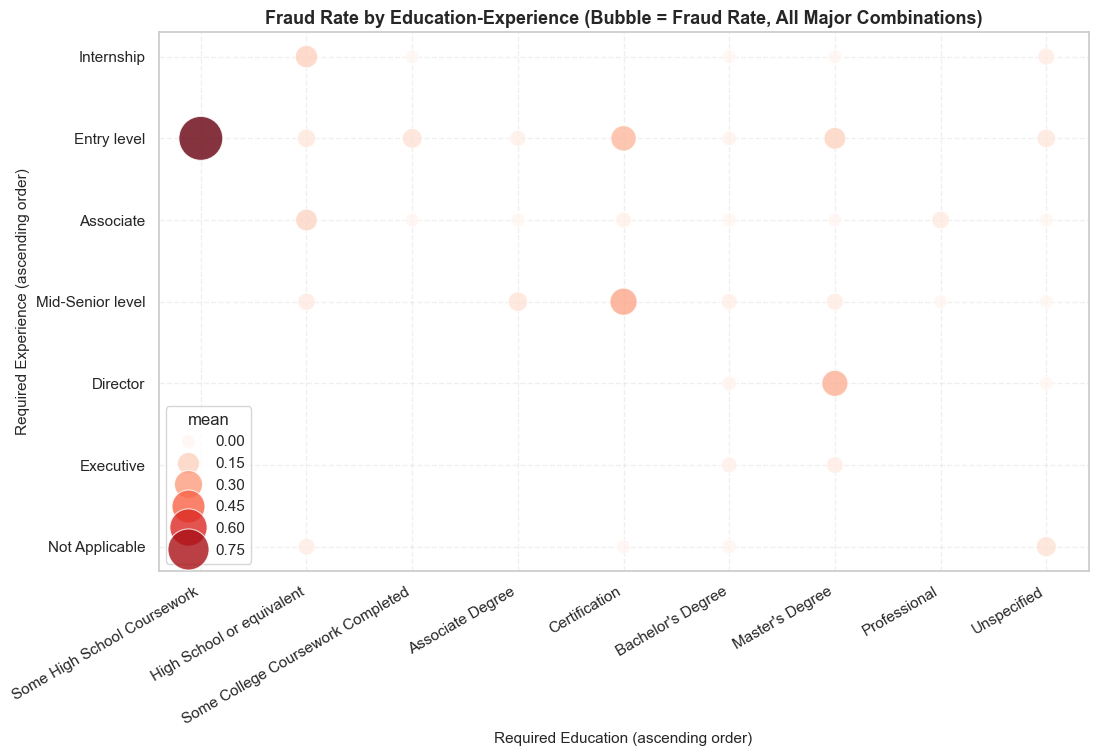

In [17]:
# compute fraud rate + count to filter rare pairs
edu_exp_data = (
    df.groupby(['required_education', 'required_experience'])['fraudulent']
    .agg(['mean', 'count'])
    .reset_index()
)

# filter out very rare combos (<10 samples)
edu_exp_data = edu_exp_data[edu_exp_data['count'] >= 10]

# define logical ascending orders
education_order = [
    'Some High School Coursework',
    'High School or equivalent',
    'Some College Coursework Completed',
    'Associate Degree',
    'Certification',
    "Bachelor's Degree",
    "Master's Degree",
    'Professional',
    'Unspecified'
]

experience_order = [
    'Internship',
    'Entry level',
    'Associate',
    'Mid-Senior level',
    'Director',
    'Executive',
    'Not Applicable'
]

# ensure consistent categorical order
edu_exp_data['required_education'] = pd.Categorical(
    edu_exp_data['required_education'], categories=education_order, ordered=True
)
edu_exp_data['required_experience'] = pd.Categorical(
    edu_exp_data['required_experience'], categories=experience_order, ordered=True
)

# plot bubble chart
plt.figure(figsize=(12,7))
scatter = sns.scatterplot(
    data=edu_exp_data,
    x='required_education',
    y='required_experience',
    hue='mean',
    size='mean',
    sizes=(100, 1000),
    palette='Reds',
    alpha=0.8,
    legend='brief'
)

plt.title("Fraud Rate by Education-Experience (Bubble = Fraud Rate, All Major Combinations)", fontsize=13, weight='bold')
plt.xlabel("Required Education (ascending order)", fontsize=11)
plt.ylabel("Required Experience (ascending order)", fontsize=11)
plt.xticks(rotation=30, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)

# replace small legend with colorbar
norm = plt.Normalize(edu_exp_data['mean'].min(), edu_exp_data['mean'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Fraud Rate')

plt.tight_layout()
plt.show()

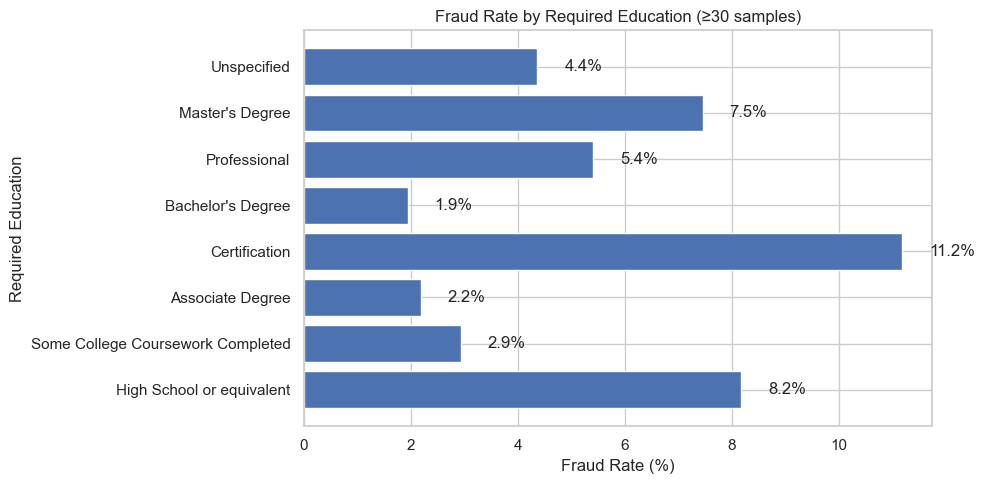

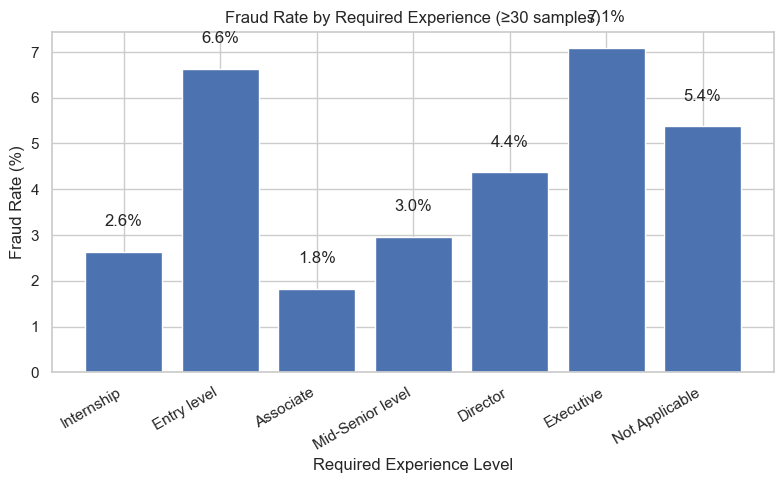

In [18]:
from pandas.api.types import CategoricalDtype

def fraud_rate_table(df, col, min_rows=30):
    tmp = (
        df.groupby(col)["fraudulent"]
          .agg(["mean", "count", "sum"])
          .rename(columns={
              "mean": "fraud_rate",
              "count": "num_rows",
              "sum": "num_fraud_posts"
          })
          .reset_index()
    )
    # keep only categories with enough support
    tmp = tmp[tmp["num_rows"] >= min_rows]
    return tmp

# define an ordinal order for education
education_order = [
    "Some High School Coursework",
    "High School or equivalent",
    "Some College Coursework Completed",
    "Associate Degree",
    "Certification",
    "Bachelor's Degree",
    "Professional",
    "Master's Degree",
    "Doctorate",
    "PhD",
    "Unspecified",
]

edu_stats = fraud_rate_table(df, "required_education", min_rows=30)

# cast to ordered categorical so we can sort in order
edu_cat_type = CategoricalDtype(categories=education_order, ordered=True)
edu_stats["required_education"] = edu_stats["required_education"].astype(edu_cat_type)

# drop rows that aren't in our defined order (NaN after astype)
edu_stats = edu_stats.dropna(subset=["required_education"])

# sort by order
edu_stats = edu_stats.sort_values("required_education")

# convert fraud rate to %
edu_stats["fraud_rate_pct"] = edu_stats["fraud_rate"] * 100

# plot
plt.figure(figsize=(10,5))
plt.barh(
    edu_stats["required_education"],
    edu_stats["fraud_rate_pct"]
)
plt.xlabel("Fraud Rate (%)")
plt.ylabel("Required Education")
plt.title("Fraud Rate by Required Education (≥30 samples)")
# annotate bars with % values
for i, (rate, y) in enumerate(zip(edu_stats["fraud_rate_pct"], edu_stats["required_education"])):
    plt.text(rate + 0.5, i, f"{rate:.1f}%", va="center")
plt.tight_layout()
plt.show()

# define an ordinal order for experience
experience_order = [
    "Internship",
    "Entry level",
    "Associate",
    "Mid-Senior level",
    "Director",
    "Executive",
    "Not Applicable",
]

exp_stats = fraud_rate_table(df, "required_experience", min_rows=30)

exp_cat_type = CategoricalDtype(categories=experience_order, ordered=True)
exp_stats["required_experience"] = exp_stats["required_experience"].astype(exp_cat_type)

exp_stats = exp_stats.dropna(subset=["required_experience"])
exp_stats = exp_stats.sort_values("required_experience")

exp_stats["fraud_rate_pct"] = exp_stats["fraud_rate"] * 100

plt.figure(figsize=(8,5))
plt.bar(
    exp_stats["required_experience"],
    exp_stats["fraud_rate_pct"]
)
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Required Experience Level")
plt.title("Fraud Rate by Required Experience (≥30 samples)")
plt.xticks(rotation=30, ha="right")

# annotate bars
for x, rate in zip(exp_stats["required_experience"], exp_stats["fraud_rate_pct"]):
    plt.text(x, rate + 0.5, f"{rate:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


Doing a deep dive into the location column

In [ ]:
def extract_country(location):
    if pd.isna(location):
        return np.nan
    parts = [x.strip() for x in location.split(',')]
    return parts[0] if len(parts) > 0 else np.nan

df['country'] = df['location'].apply(extract_country)

df['country'].nunique()


90

In [21]:
country_counts = df['country'].value_counts(normalize=True)
country_counts.head(20)


country
US    0.607734
GB    0.135964
GR    0.053610
CA    0.026064
DE    0.021843
NZ    0.018992
IN    0.015741
AU    0.012205
PH    0.007528
NL    0.007243
BE    0.006673
IE    0.006502
SG    0.004563
HK    0.004391
PL    0.004334
IL    0.004106
EE    0.004106
FR    0.003992
ES    0.003764
AE    0.003080
Name: proportion, dtype: float64

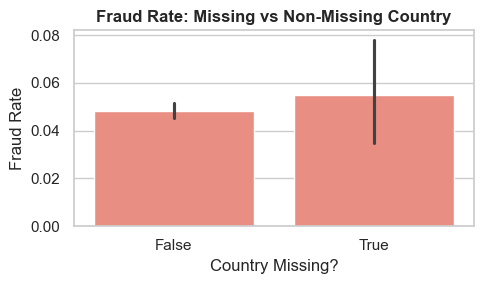

In [22]:
plt.figure(figsize=(5,3))
sns.barplot(
    x=df['country'].isna(),
    y=df['fraudulent'],
    estimator='mean',
    color='salmon'
)
plt.title("Fraud Rate: Missing vs Non-Missing Country", fontsize=12, weight='bold')
plt.xlabel("Country Missing?")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.show()

Since countries have 90 unique values, we will experiment with binning strategies

In [23]:
threshold = 0.01  # 1% of total
major_countries = country_counts[country_counts >= threshold].index

df['country_binned'] = df['country'].apply(
    lambda x: x if x in major_countries else 'Other'
)

df['country_binned'].value_counts()

country_binned
US       10656
GB        2384
Other     2237
GR         940
CA         457
DE         383
NZ         333
IN         276
AU         214
Name: count, dtype: int64

In [26]:
def extract_state(location):
    if pd.isna(location):
        return np.nan
    parts = [x.strip() for x in location.split(',')]
    return parts[1] if len(parts) > 1 else np.nan

df['state'] = df['location'].apply(extract_state)
df[['location', 'state']].head()

,location,state
0,"US, NY, New York",NY
1,"NZ, , Auckland",
2,"US, IA, Wever",IA
3,"US, DC, Washington",DC
4,"US, FL, Fort Worth",FL


In [27]:
def extract_city(location):
    if pd.isna(location):
        return np.nan
    parts = [x.strip() for x in location.split(',')]
    return parts[2] if len(parts) > 2 else np.nan

df['city'] = df['location'].apply(extract_city)
df[['location', 'city']].head()

,location,city
0,"US, NY, New York",New York
1,"NZ, , Auckland",Auckland
2,"US, IA, Wever",Wever
3,"US, DC, Washington",Washington
4,"US, FL, Fort Worth",Fort Worth


In [ ]:
df['location_filled_count'] = df[['country', 'state', 'city']].notna().sum(axis=1)

fraud_by_loc_detail = (
    df.groupby('location_filled_count')['fraudulent']
    .mean()
    .reset_index()
    .rename(columns={'fraudulent': 'fraud_rate'})
)
display(fraud_by_loc_detail)


,location_filled_count,fraud_rate
0,0,0.054913
1,1,0.053191
2,2,0.048729
3,3,0.047906


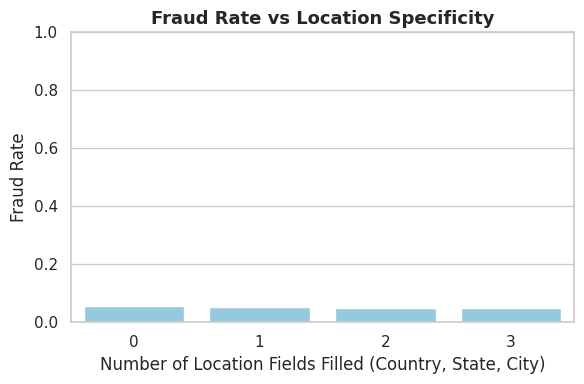

In [ ]:
# check the fraud rate vs location specificity - whether the location is filled or not
plt.figure(figsize=(6,4))
sns.barplot(
    data=fraud_by_loc_detail,
    x='location_filled_count',
    y='fraud_rate',
    color='skyblue'
)
plt.title("Fraud Rate vs Location Specificity", fontsize=13, weight='bold')
plt.xlabel("Number of Location Fields Filled (Country, State, City)")
plt.ylabel("Fraud Rate")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


Experimenting with interaction feature between cat and binary feature - country x telecommuting

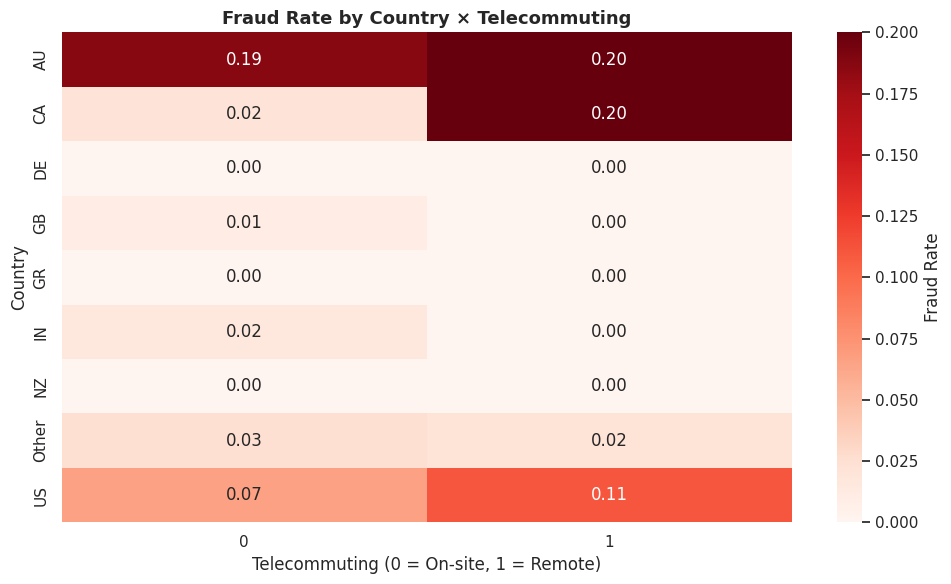

In [ ]:
cross_ct = (
    df.groupby(['country_binned', 'telecommuting'])['fraudulent']
    .mean()
    .unstack()
    .fillna(0)
)

plt.figure(figsize=(10,6))
sns.heatmap(
    cross_ct,
    annot=True, fmt=".2f", cmap="Reds",
    cbar_kws={'label': 'Fraud Rate'}
)
plt.title("Fraud Rate by Country x Telecommuting", fontsize=13, weight='bold')
plt.xlabel("Telecommuting (0 = On-site, 1 = Remote)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Experimenting interaction feature between country and salary range

In [ ]:
# replace empty strings with nan for consistency
df['salary_range'] = df['salary_range'].replace('', np.nan)

# only split rows where salary_range is not null
df[['salary_low', 'salary_high']] = (
    df['salary_range']
    .dropna()
    .str.split('-', n=1, expand=True)
)

# convert to numeric, coercing invalid text to nan
df['salary_low'] = pd.to_numeric(df['salary_low'], errors='coerce')
df['salary_high'] = pd.to_numeric(df['salary_high'], errors='coerce')

# compute salary average
df['salary_avg'] = df[['salary_low', 'salary_high']].mean(axis=1)

# drop rows where no valid salary info exists
df = df[df['salary_avg'].notna()].copy()

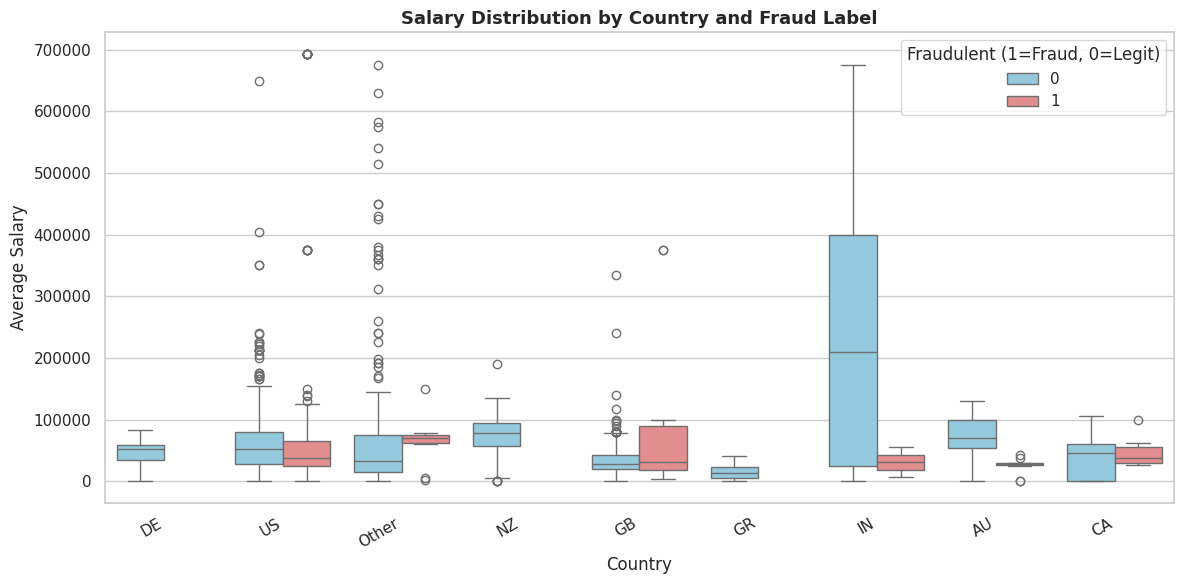

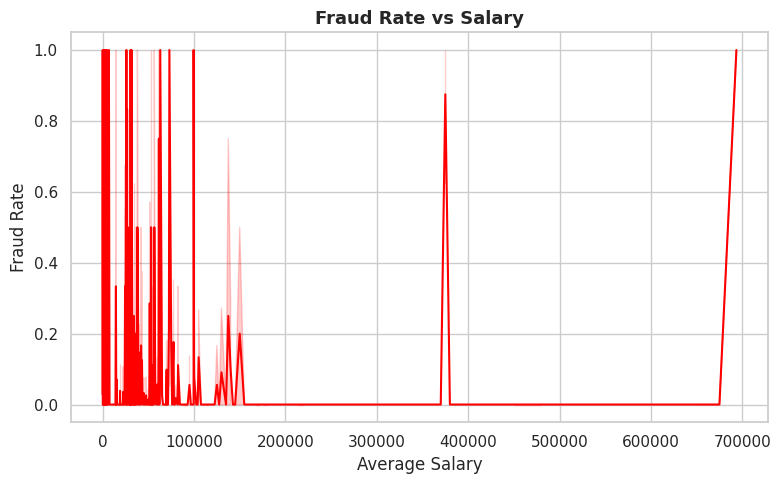

In [ ]:
# remove top 1% and bottom 1%
df = df[
    (df['salary_avg'] >= df['salary_avg'].quantile(0.01)) &
    (df['salary_avg'] <= df['salary_avg'].quantile(0.99))
]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='country_binned',
    y='salary_avg',
    hue='fraudulent',
    palette=['skyblue', 'lightcoral']
)
plt.title("Salary Distribution by Country and Fraud Label", fontsize=13, weight='bold')
plt.xlabel("Country")
plt.ylabel("Average Salary")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Fraudulent (1=Fraud, 0=Legit)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x='salary_avg',
    y='fraudulent',
    estimator='mean',
    color='red'
)
plt.title("Fraud Rate vs Salary", fontsize=13, weight='bold')
plt.xlabel("Average Salary")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.show()


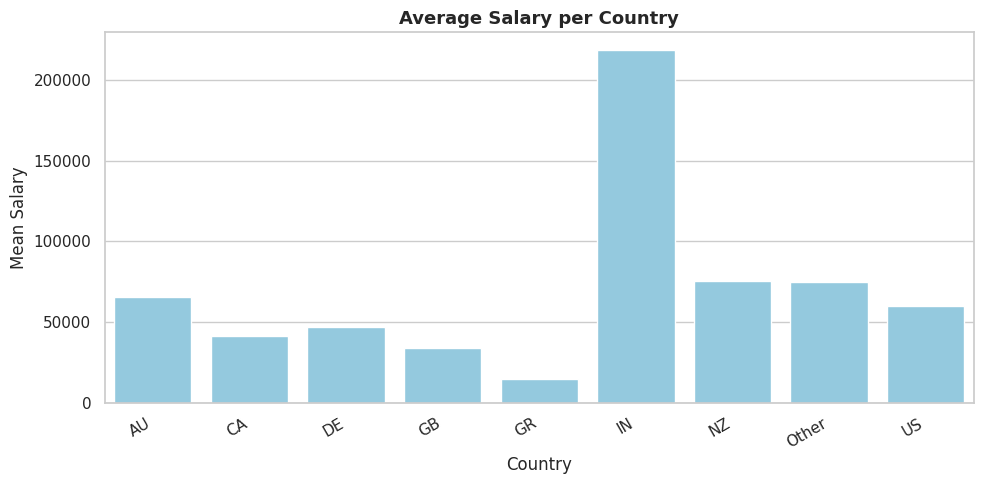

In [ ]:
# using country binned and salary average to see the average salary per country
cross_salary = (
    df.groupby('country_binned')['salary_avg']
    .agg(['mean', 'count'])
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(
    data=cross_salary,
    x='country_binned',
    y='mean',
    color='skyblue'
)
plt.title("Average Salary per Country", fontsize=13, weight='bold')
plt.xlabel("Country")
plt.ylabel("Mean Salary")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


Experiementing interaction feature between country and industry

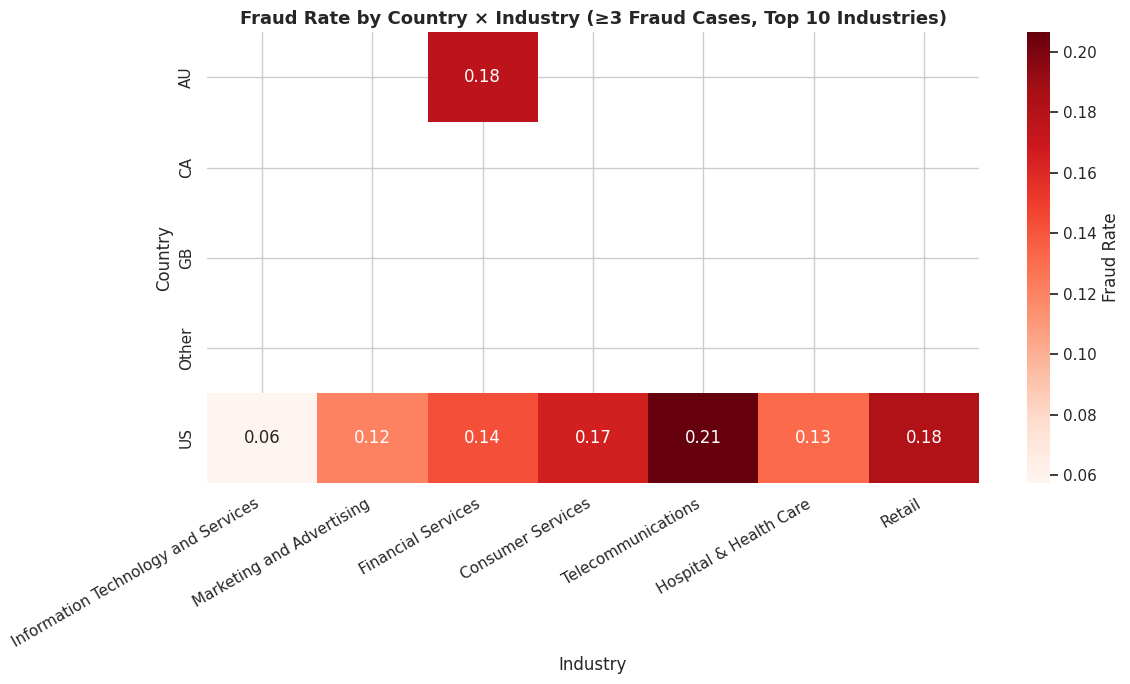

In [ ]:
# compute both fraud rate, fraud count, and total count
cross_data = (
    df.groupby(['country_binned', 'industry'])
    .agg(
        fraud_rate=('fraudulent', 'mean'),
        total_cases=('fraudulent', 'size'),
        fraud_cases=('fraudulent', 'sum')
    )
    .reset_index()
)

# keep only groups with at least 5 fraud cases
cross_data = cross_data[cross_data['fraud_cases'] >= 3]

# pivot to wide format for heatmap
cross_ind = cross_data.pivot(index='country_binned', columns='industry', values='fraud_rate')

# restrict to top 10 industries by frequency overall
top_industries = df['industry'].value_counts().nlargest(10).index
cross_ind = cross_ind[top_industries.intersection(cross_ind.columns)]

# plot
plt.figure(figsize=(12,7))
sns.heatmap(
    cross_ind,
    cmap='Reds',
    annot=True,
    fmt=".2f",
    cbar_kws={'label':'Fraud Rate'}
)
plt.title("Fraud Rate by Country × Industry (≥3 Fraud Cases, Top 10 Industries)", fontsize=13, weight='bold')
plt.xlabel("Industry")
plt.ylabel("Country")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


Experimenting interaction feature between country and function

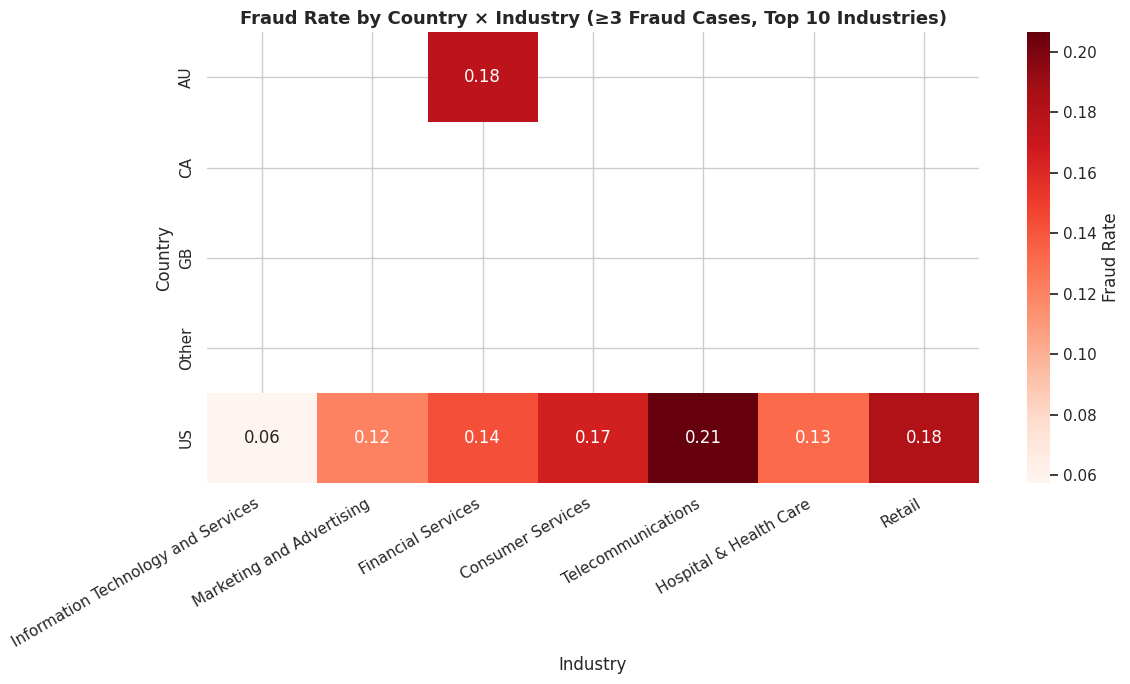

In [ ]:
# compute both fraud rate, fraud count, and total count
cross_data = (
    df.groupby(['country_binned', 'industry'])
    .agg(
        fraud_rate=('fraudulent', 'mean'),
        total_cases=('fraudulent', 'size'),
        fraud_cases=('fraudulent', 'sum')
    )
    .reset_index()
)

# keep only groups with at least 5 fraud cases
cross_data = cross_data[cross_data['fraud_cases'] >= 3]

# pivot to wide format for heatmap
cross_ind = cross_data.pivot(index='country_binned', columns='industry', values='fraud_rate')

# restrict to top 10 industries by frequency overall
top_industries = df['industry'].value_counts().nlargest(10).index
cross_ind = cross_ind[top_industries.intersection(cross_ind.columns)]

# plot
plt.figure(figsize=(12,7))
sns.heatmap(
    cross_ind,
    cmap='Reds',
    annot=True,
    fmt=".2f",
    cbar_kws={'label':'Fraud Rate'}
)
plt.title("Fraud Rate by Country × Industry (≥3 Fraud Cases, Top 10 Industries)", fontsize=13, weight='bold')
plt.xlabel("Industry")
plt.ylabel("Country")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


Doing a deep dive into the departments feature

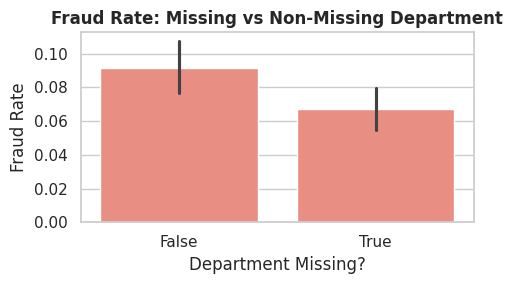

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(
    x=df['department'].isna(),
    y=df['fraudulent'],
    estimator='mean',
    color='salmon'
)
plt.title("Fraud Rate: Missing vs Non-Missing Department", fontsize=12, weight='bold')
plt.xlabel("Department Missing?")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.show()


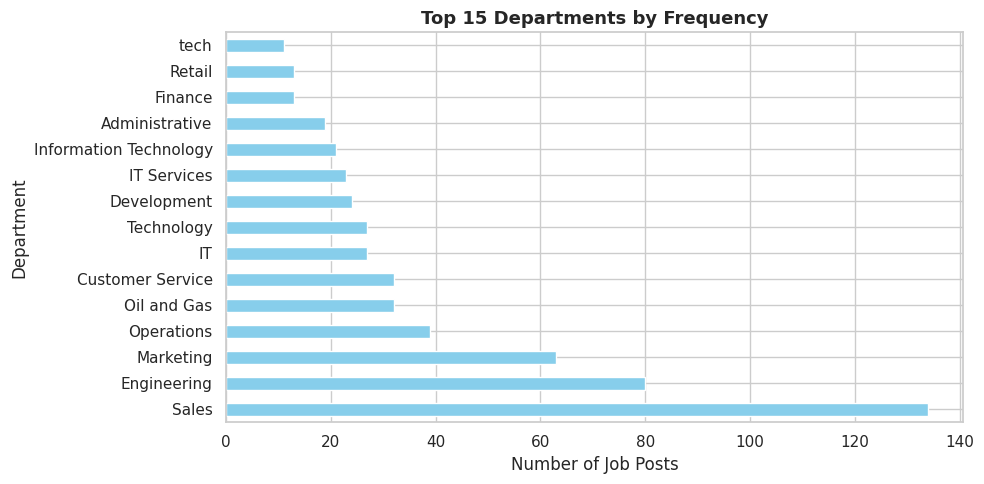

In [ ]:
plt.figure(figsize=(10,5))
df['department'].value_counts().head(15).plot(kind='barh', color='skyblue')
plt.title("Top 15 Departments by Frequency", fontsize=13, weight='bold')
plt.xlabel("Number of Job Posts")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


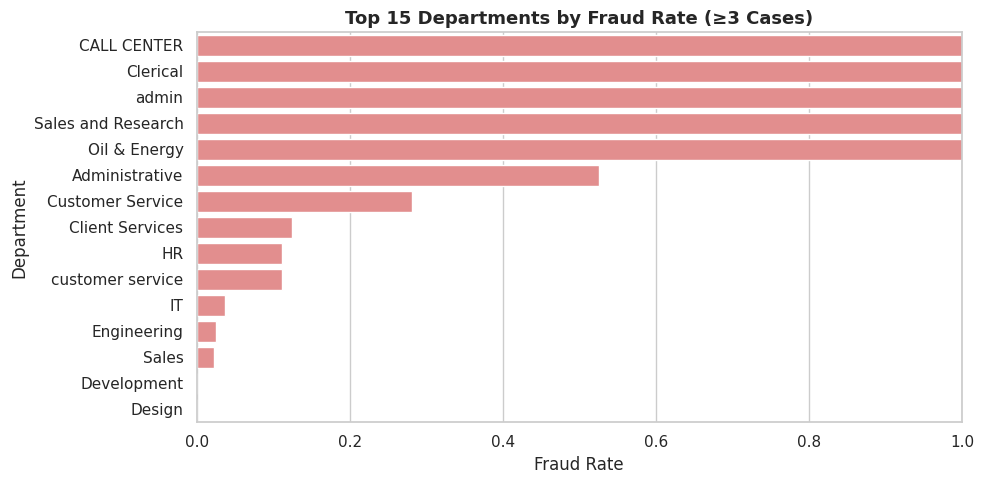

In [ ]:
# compute fraud rate and total count per department
fraud_by_dept = (
    df.groupby('department')['fraudulent']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'fraud_rate', 'count': 'total_posts'})
)

# keep only departments with at least 3 total job posts
fraud_by_dept = fraud_by_dept[fraud_by_dept['total_posts'] >= 5]

# sort by fraud rate descending
fraud_by_dept = fraud_by_dept.sort_values('fraud_rate', ascending=False)

# plot top 15 departments
plt.figure(figsize=(10,5))
sns.barplot(
    data=fraud_by_dept.head(15),
    x='fraud_rate',
    y='department',
    color='lightcoral'
)
plt.title("Top 15 Departments by Fraud Rate (≥3 Cases)", fontsize=13, weight='bold')
plt.xlabel("Fraud Rate")
plt.ylabel("Department")
plt.xlim(0,1)
plt.tight_layout()
plt.show()


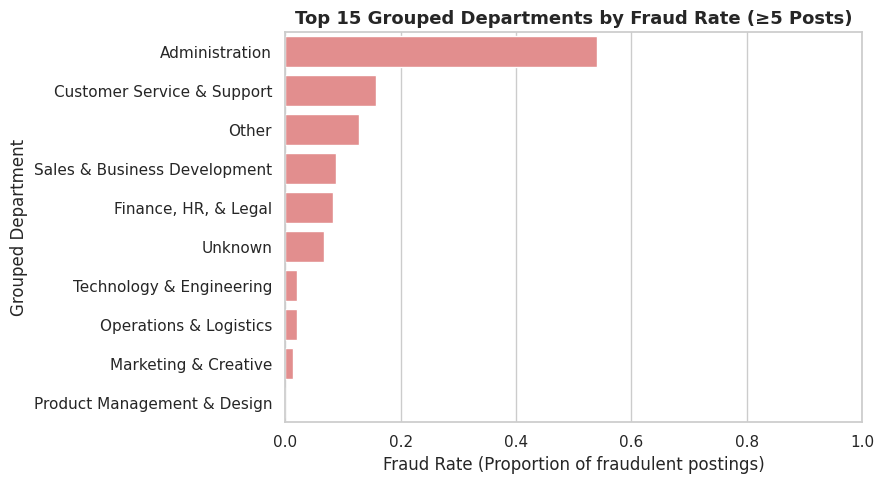

In [ ]:
# compute fraud rate and total count per grouped department
fraud_by_dept_grouped = (
    df.groupby('department_grouped')['fraudulent']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'fraud_rate', 'count': 'total_posts'})
)

# keep only departments with at least 5 total job posts
fraud_by_dept_grouped = fraud_by_dept_grouped[fraud_by_dept_grouped['total_posts'] >= 5]

# sort by fraud rate descending
fraud_by_dept_grouped = fraud_by_dept_grouped.sort_values('fraud_rate', ascending=False)

# visualize top 15 grouped departments
plt.figure(figsize=(9,5))
sns.barplot(
    data=fraud_by_dept_grouped.head(15),
    x='fraud_rate',
    y='department_grouped',
    color='lightcoral'
)
plt.title("Top 15 Grouped Departments by Fraud Rate (≥5 Posts)", fontsize=13, weight='bold')
plt.xlabel("Fraud Rate (Proportion of fraudulent postings)")
plt.ylabel("Grouped Department")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
print("Unique departments:", df['department'].nunique())
print("Missing values:", df['department'].isna().sum())
print("\nTop 10 departments by frequency:")
print(df['department'].value_counts().head(10))


Unique departments: 410
Missing values: 1564

Top 10 departments by frequency:
department
Sales               134
Engineering          80
Marketing            63
Operations           39
Oil and Gas          32
Customer Service     32
IT                   27
Technology           27
Development          24
IT Services          23
Name: count, dtype: int64


In [ ]:
# clean and preview unique department values
departments = (
    df['department']
    .astype(str)
    .str.lower()
    .str.strip()
    .dropna()
    .unique()
)

# display sample to have a feel of the data
departments[:100]

array(['androidpit', 'nan', 'sales', 'businessfriend.com',
       'human resources', 'oil & energy', 'marketplace', 'fp',
       'operations', 'sales and business development', 'development',
       'production', 'field operations', 'technology',
       'approvals department', 'playfair capital', 'software development',
       'business development', 'media', 'financial', 'retail',
       'marketing and communications', 'dtvma', 'g&a',
       'account management', 'solution test', 'hr', 'marketing', 'it',
       'bdc', 'afsdtv', 'engineering', 'csl', 'editorial', 'recruiter',
       'hse (health safety environmental)', 'product', 'accounting',
       'csa rep', 'service-rep', 'admin', 'st', 'risk management',
       'd3249', 'refined resources', 'service coordinator ii',
       'agency confidential', 'ux', 'finance', 'administrative',
       'ip secuirty', 'customer care', 'server administration',
       'north orange', 'rd', 'product management', 'rippleshot',
       'java,.net and we

In [ ]:
# binning strategy for departments
def map_department(dept):
    # groups department names into broader categories based on keywords
    if pd.isna(dept):
        return 'Unknown'

    # convert to lowercase for consistent matching
    dept = dept.lower().strip()

    # define keyword-based groups
    if any(k in dept for k in ['eng', 'dev', 'tech', 'it', 'technical', 'program', 'r&d', 'qa', 'architect', 'data science', 'platform', 'network', 'telecom', 'information technology', 'software']):
        return 'Technology & Engineering'
    elif any(k in dept for k in ['market', 'creative', 'design', 'content', 'edit', 'media', 'pr', 'advertis', 'brand', 'design', 'performance marketing']):
        return 'Marketing & Creative'
    elif any(k in dept for k in ['sale', 'business dev', 'bd', 'client', 'account', 'commercial', 'revenue']):
        return 'Sales & Business Development'
    elif any(k in dept for k in ['operat', 'production', 'logis', 'supply', 'warehouse', 'maintenance', 'project managem', 'csd relay', 'distribution']):
        return 'Operations & Logistics'
    elif any(k in dept for k in ['product', 'ux', 'user experience', 'ui']):
        return 'Product Management & Design'
    elif any(k in dept for k in ['finance', 'account', 'legal', 'hr', 'human resourc', 'talent', 'compliance']):
        return 'Finance, HR, & Legal'
    elif any(k in dept for k in ['customer', 'support', 'service']):
        return 'Customer Service & Support'
    elif any(k in dept for k in ['admin', 'clerical', 'administrative']):
        return 'Administration'
    # group remaining departments into 'Other'
    else:
        return 'Other'

df['department_grouped'] = df['department'].apply(map_department)
print(df['department_grouped'].value_counts())

department_grouped
Unknown                         1564
Other                            367
Technology & Engineering         334
Sales & Business Development     193
Marketing & Creative             154
Customer Service & Support        83
Operations & Logistics            51
Administration                    50
Finance, HR, & Legal              36
Product Management & Design        9
Name: count, dtype: int64


In [ ]:
print(df['department_grouped'].value_counts().head(15))

department_grouped
Unknown                         1564
Other                            367
Technology & Engineering         334
Sales & Business Development     193
Marketing & Creative             154
Customer Service & Support        83
Operations & Logistics            51
Administration                    50
Finance, HR, & Legal              36
Product Management & Design        9
Name: count, dtype: int64


In [ ]:
# look at the most common unmapped departments
unmapped = df.loc[df['department_grouped'] == 'other', 'department'].value_counts()
print(unmapped)


department
BDC                   5
AFSSA                 5
AFSCC                 4
OptionsAway           4
AFSDT                 4
                     ..
BCFB                  1
Investment Banking    1
Head Start            1
Business Strategy     1
HOTEL JOBS            1
Name: count, Length: 165, dtype: int64


Doing a deep dive into the expereince column

In [ ]:
print("Unique experience levels:", df['required_experience'].nunique())
print("Missing values:", df['required_experience'].isna().sum())
print("\nTop 10 experience levels by frequency:")
print(df['required_experience'].value_counts().head(10))


Unique experience levels: 7
Missing values: 328

Top 10 experience levels by frequency:
required_experience
Mid-Senior level    827
Entry level         635
Associate           549
Not Applicable      295
Director             88
Internship           75
Executive            44
Name: count, dtype: int64


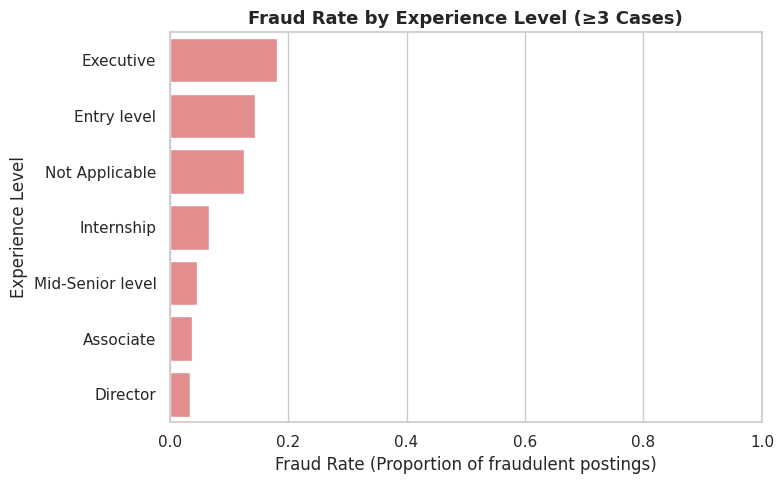

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=fraud_by_exp,
    x='fraud_rate',
    y='required_experience',
    color='lightcoral'
)
plt.title("Fraud Rate by Experience Level (≥3 Cases)", fontsize=13, weight='bold')
plt.xlabel("Fraud Rate (Proportion of fraudulent postings)")
plt.ylabel("Experience Level")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

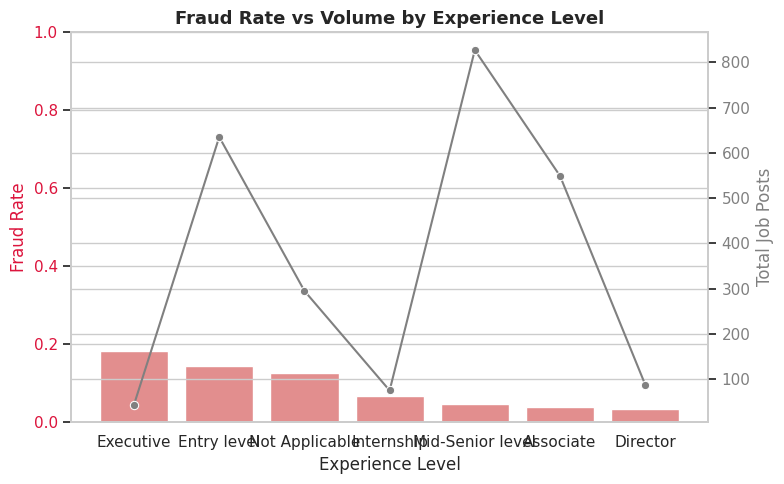

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))

# bar for fraud rate
sns.barplot(
    data=fraud_by_exp,
    x='required_experience',
    y='fraud_rate',
    color='lightcoral',
    ax=ax1
)
ax1.set_ylabel('Fraud Rate', color='crimson')
ax1.set_xlabel('Experience Level')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y', labelcolor='crimson')
ax1.set_title("Fraud Rate vs Volume by Experience Level", fontsize=13, weight='bold')

# line for total job postings
ax2 = ax1.twinx()
sns.lineplot(
    data=fraud_by_exp,
    x='required_experience',
    y='total_posts',
    color='gray',
    marker='o',
    ax=ax2
)
ax2.set_ylabel('Total Job Posts', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [ ]:
fraud_by_exp = (
    df.groupby('required_experience')['fraudulent']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'fraud_rate', 'count': 'total_posts'})
)

# keep only experience levels with at least 3 cases to ensure reliability
fraud_by_exp = fraud_by_exp[fraud_by_exp['total_posts'] >= 3]

# sort by fraud rate
fraud_by_exp = fraud_by_exp.sort_values('fraud_rate', ascending=False)

print("\nFraud rate summary by experience level:")
print(fraud_by_exp)


Fraud rate summary by experience level:
  required_experience  fraud_rate  total_posts
3           Executive    0.181818           44
2         Entry level    0.144882          635
6      Not Applicable    0.125424          295
4          Internship    0.066667           75
5    Mid-Senior level    0.045949          827
0           Associate    0.038251          549
1            Director    0.034091           88


Experimenting interaction feature between education and required experience


Top 10 Education × Experience combinations by fraud rate:
                   required_education required_experience  fraud_rate  \
15                      Certification    Mid-Senior level    0.533333   
24          High School or equivalent          Internship    0.375000   
17                          Doctorate           Associate    0.333333   
44  Some College Coursework Completed    Mid-Senior level    0.333333   
14                      Certification         Entry level    0.285714   
22          High School or equivalent         Entry level    0.265873   
20          High School or equivalent           Associate    0.222222   
30                    Master's Degree           Executive    0.200000   
54                        Unspecified      Not Applicable    0.181818   
34                       Professional           Associate    0.166667   

    total_posts  
15           15  
24            8  
17            3  
44            3  
14           14  
22          252  
20         

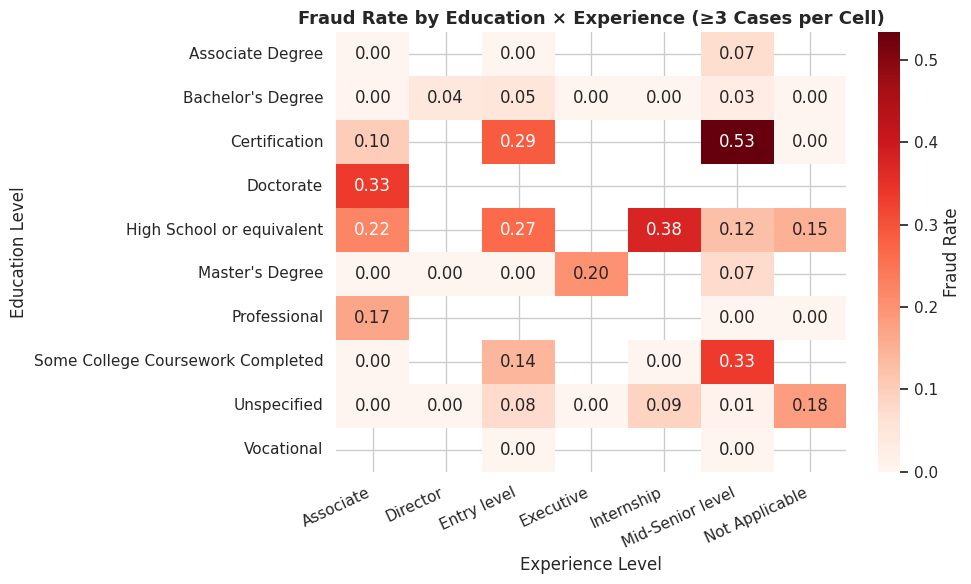

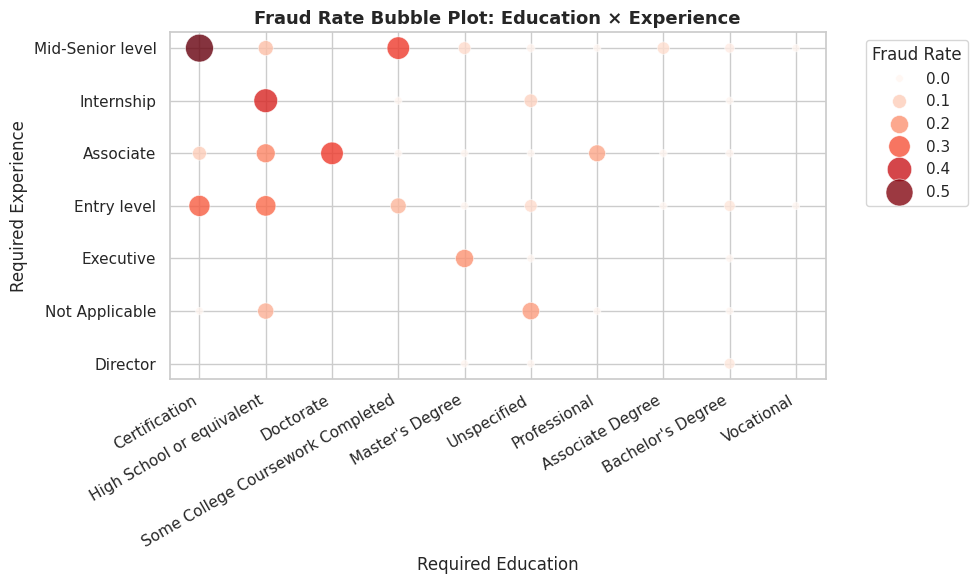


⚠️ High-risk combinations (low education × low experience):
                   required_education required_experience  fraud_rate  \
24          High School or equivalent          Internship    0.375000   
22          High School or equivalent         Entry level    0.265873   
20          High School or equivalent           Associate    0.222222   
54                        Unspecified      Not Applicable    0.181818   
26          High School or equivalent      Not Applicable    0.151515   
42  Some College Coursework Completed         Entry level    0.142857   
52                        Unspecified          Internship    0.090909   
50                        Unspecified         Entry level    0.075269   
48                        Unspecified           Associate    0.000000   
43  Some College Coursework Completed          Internship    0.000000   
40  Some College Coursework Completed           Associate    0.000000   

    total_posts  
24            8  
22          252  
20      

In [ ]:
edu_exp = (
    df.groupby(['required_education', 'required_experience'])['fraudulent']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'fraud_rate', 'count': 'total_posts'})
)

# keep only reliable combinations (≥3 total posts)
edu_exp = edu_exp[edu_exp['total_posts'] >= 3]

# sort for inspection
edu_exp = edu_exp.sort_values('fraud_rate', ascending=False)

print("\nTop 10 Education x Experience combinations by fraud rate:")
print(edu_exp.head(10))

# heatmap - fraud rate by education × experience

pivot = edu_exp.pivot(index='required_education', columns='required_experience', values='fraud_rate')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt=".2f", cbar_kws={'label': 'Fraud Rate'})
plt.title("Fraud Rate by Education x Experience (≥3 Cases per Cell)", fontsize=13, weight='bold')
plt.xlabel("Experience Level")
plt.ylabel("Education Level")
plt.xticks(rotation=25, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 3d scatter or bubble plot - optional visual confirmation

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=edu_exp,
    x='required_education',
    y='required_experience',
    size='fraud_rate',
    hue='fraud_rate',
    palette='Reds',
    sizes=(30, 400),
    alpha=0.8
)
plt.title("Fraud Rate Bubble Plot: Education × Experience", fontsize=13, weight='bold')
plt.xlabel("Required Education")
plt.ylabel("Required Experience")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Fraud Rate", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# insight extraction

low_edu_low_exp = edu_exp[
    edu_exp['required_education'].str.contains("High School|Some College|Unspecified", case=False, na=False) &
    edu_exp['required_experience'].str.contains("Internship|Entry|Not Applicable|Associate", case=False, na=False)
]

print("\nHigh-risk combinations (low education x low experience):")
print(low_edu_low_exp[['required_education', 'required_experience', 'fraud_rate', 'total_posts']])

Industry column binning strategy

In [ ]:
print("Unique industries:", df['industry'].nunique())
print("Missing values:", df['industry'].isna().sum())
print("\nTop 10 industries by frequency:")
print(df['industry'].value_counts().head(10))

Unique industries: 115
Missing values: 133

Top 10 industries by frequency:
industry
Information Technology and Services    454
Computer Software                      262
Internet                               232
Marketing and Advertising              188
Financial Services                     135
Consumer Services                      115
Telecommunications                      95
Hospital & Health Care                  71
Retail                                  65
Automotive                              60
Name: count, dtype: int64


In [ ]:
# treat missing or blank as 'Unknown'
df['industry_cleaned'] = df['industry'].fillna('Unknown').str.strip()

# collapse rare categories
rare_threshold = 10
industry_counts = df['industry_cleaned'].value_counts()
rare_industries = industry_counts[industry_counts < rare_threshold].index
df['industry_binned'] = df['industry_cleaned'].replace(rare_industries, 'Other')


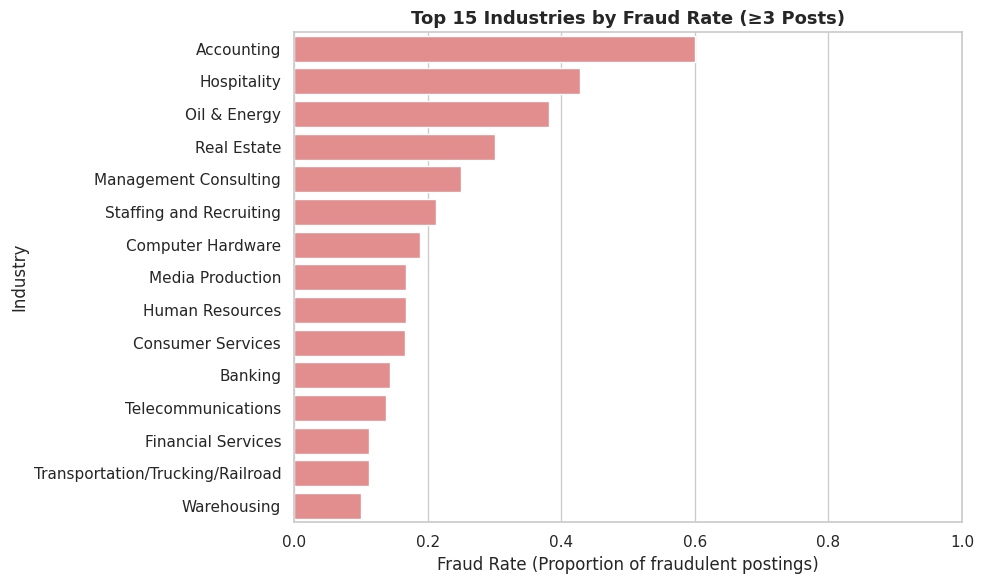

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=fraud_by_industry.head(15),
    x='fraud_rate',
    y='industry_binned',
    color='lightcoral'
)
plt.title("Top 15 Industries by Fraud Rate (≥3 Posts)", fontsize=13, weight='bold')
plt.xlabel("Fraud Rate (Proportion of fraudulent postings)")
plt.ylabel("Industry")
plt.xlim(0,1)
plt.tight_layout()
plt.show()


Experimenting industry and country interaction

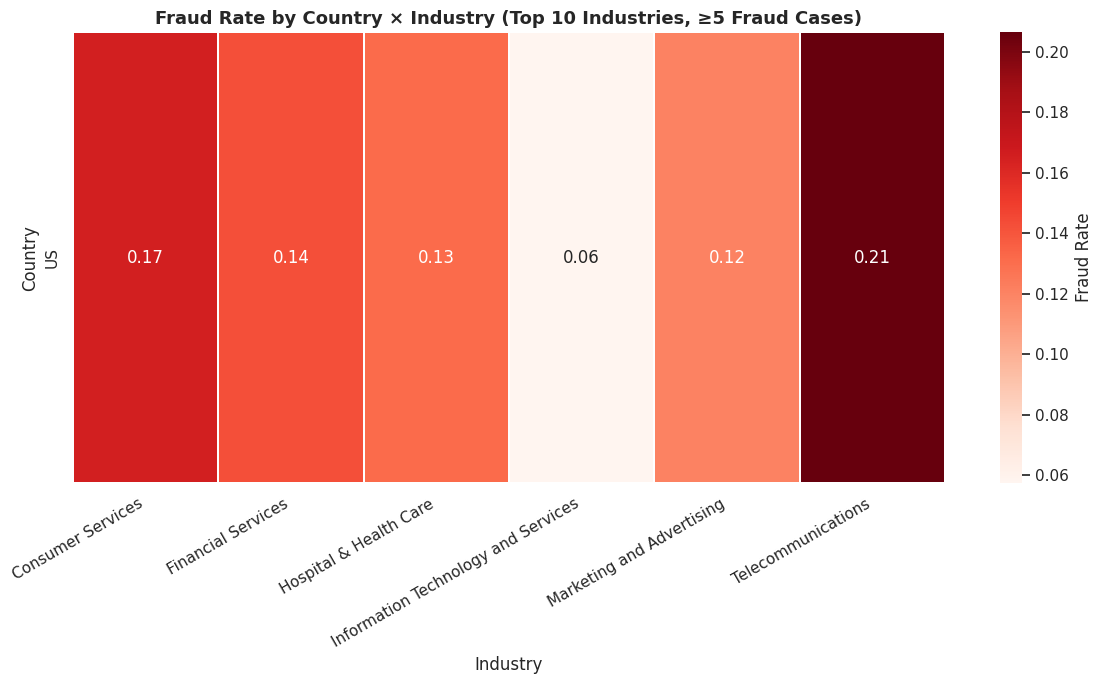

In [ ]:
# ensure both columns exist and handle missing
df['industry_cleaned'] = df['industry'].fillna('Unknown').str.strip()
rare_countries = df['country_cleaned'].value_counts()[df['country_cleaned'].value_counts() < 5].index
df['country_cleaned'] = df['country_cleaned'].replace(rare_countries, 'Other')

# compute fraud rate + count

industry_country = (
    df.groupby(['country_cleaned', 'industry_cleaned'])['fraudulent']
    .agg(['mean', 'count', 'sum'])
    .reset_index()
    .rename(columns={'mean': 'fraud_rate', 'count': 'total_posts', 'sum': 'fraud_posts'})
)

# keep only reliable data points: at least 5 fraudulent posts per combination
industry_country = industry_country[industry_country['fraud_posts'] >= 5]

# focus on top 10 industries (by frequency)

top_industries = df['industry_cleaned'].value_counts().nlargest(10).index
industry_country = industry_country[industry_country['industry_cleaned'].isin(top_industries)]

# pivot for heatmap

pivot = industry_country.pivot(index='country_cleaned', columns='industry_cleaned', values='fraud_rate')

# keep countries with at least 5 total posts (avoid 1-country noise)
valid_countries = df['country_cleaned'].value_counts()[df['country_cleaned'].value_counts() >= 3].index
pivot = pivot.loc[pivot.index.intersection(valid_countries)]

# plot heatmap

plt.figure(figsize=(12,7))
sns.heatmap(
    pivot,
    cmap='Reds',
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'Fraud Rate'},
    linewidths=0.3
)
plt.title("Fraud Rate by Country x Industry (Top 10 Industries, ≥5 Fraud Cases)", fontsize=13, weight='bold')
plt.xlabel("Industry")
plt.ylabel("Country")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

Doing a deep dive into the telecommuting column and seeing if we can create an interaction feature between country and it

In [ ]:
print(df['telecommuting'].value_counts(dropna=False))
print("\nMissing values:", df['telecommuting'].isna().sum())


telecommuting
0    2627
1     214
Name: count, dtype: int64

Missing values: 0


In [ ]:
telecommuting_summary = (
    df.groupby('telecommuting')['fraudulent']
    .agg(['mean', 'count', 'sum'])
    .reset_index()
    .rename(columns={'mean': 'fraud_rate', 'count': 'total_posts', 'sum': 'fraud_posts'})
)

# keep only ≥3 total posts
telecommuting_summary = telecommuting_summary[telecommuting_summary['total_posts'] >= 3]

print(telecommuting_summary)


   telecommuting  fraud_rate  total_posts  fraud_posts
0              0    0.076132         2627          200
1              1    0.102804          214           22


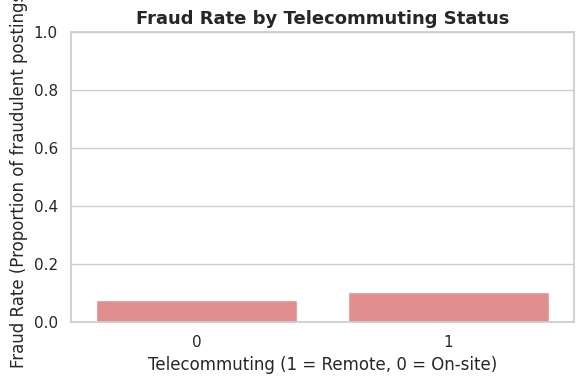

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=telecommuting_summary,
    x='telecommuting',
    y='fraud_rate',
    color='lightcoral'
)
plt.title("Fraud Rate by Telecommuting Status", fontsize=13, weight='bold')
plt.xlabel("Telecommuting (1 = Remote, 0 = On-site)")
plt.ylabel("Fraud Rate (Proportion of fraudulent postings)")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


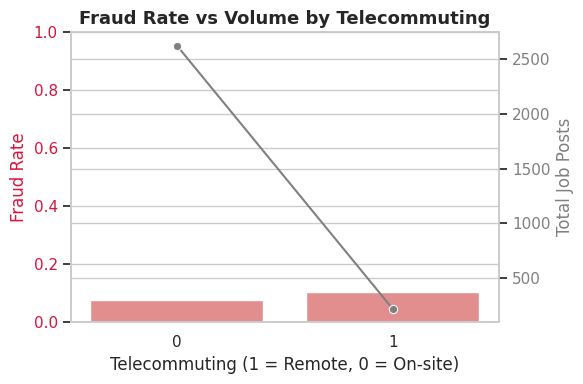

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,4))

sns.barplot(
    data=telecommuting_summary,
    x='telecommuting',
    y='fraud_rate',
    color='lightcoral',
    ax=ax1
)
ax1.set_ylabel('Fraud Rate', color='crimson')
ax1.set_xlabel('Telecommuting (1 = Remote, 0 = On-site)')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y', labelcolor='crimson')
ax1.set_title("Fraud Rate vs Volume by Telecommuting", fontsize=13, weight='bold')

ax2 = ax1.twinx()
sns.lineplot(
    data=telecommuting_summary,
    x='telecommuting',
    y='total_posts',
    color='gray',
    marker='o',
    ax=ax2
)
ax2.set_ylabel('Total Job Posts', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')
plt.tight_layout()
plt.show()


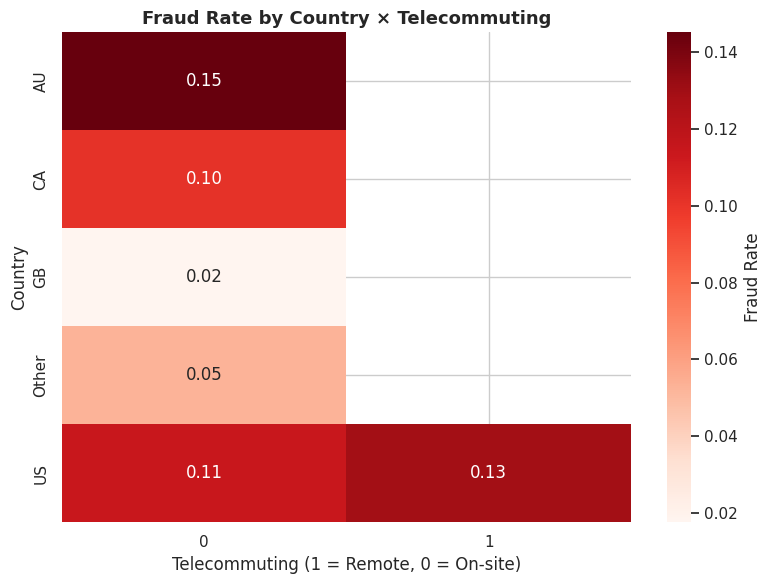

In [ ]:
tele_country = (
    df.groupby(['country_binned', 'telecommuting'])['fraudulent']
    .agg(['mean', 'count', 'sum'])
    .reset_index()
    .rename(columns={'mean': 'fraud_rate', 'count': 'total_posts', 'sum': 'fraud_posts'})
)

# keep only ≥5 fraud cases
tele_country = tele_country[tele_country['fraud_posts'] >= 5]

pivot = tele_country.pivot(index='country_binned', columns='telecommuting', values='fraud_rate')

plt.figure(figsize=(8,6))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt=".2f", cbar_kws={'label': 'Fraud Rate'})
plt.title("Fraud Rate by Country x Telecommuting", fontsize=13, weight='bold')
plt.xlabel("Telecommuting (1 = Remote, 0 = On-site)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


Deep dive has_company_logo and seeing if we can create interaction features between it and country as well as industry

In [ ]:
print(df['has_company_logo'].value_counts())

has_company_logo
1    2110
0     731
Name: count, dtype: int64


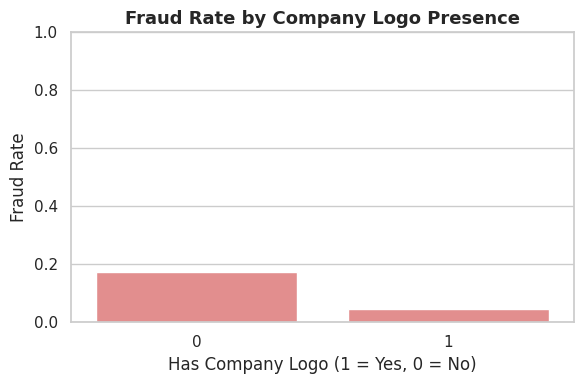

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=logo_summary,
    x='has_company_logo',
    y='fraud_rate',
    color='lightcoral'
)
plt.title("Fraud Rate by Company Logo Presence", fontsize=13, weight='bold')
plt.xlabel("Has Company Logo (1 = Yes, 0 = No)")
plt.ylabel("Fraud Rate")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


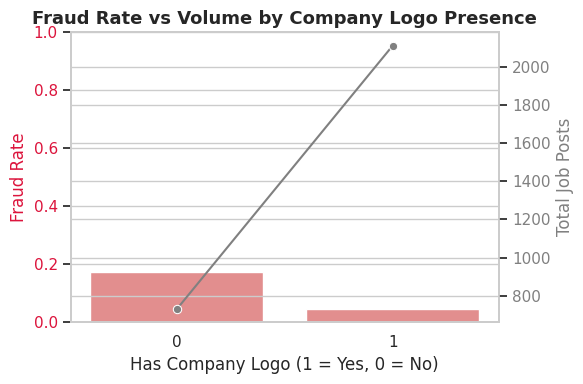

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,4))

sns.barplot(
    data=logo_summary,
    x='has_company_logo',
    y='fraud_rate',
    color='lightcoral',
    ax=ax1
)
ax1.set_ylabel('Fraud Rate', color='crimson')
ax1.set_xlabel('Has Company Logo (1 = Yes, 0 = No)')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y', labelcolor='crimson')
ax1.set_title("Fraud Rate vs Volume by Company Logo Presence", fontsize=13, weight='bold')

ax2 = ax1.twinx()
sns.lineplot(
    data=logo_summary,
    x='has_company_logo',
    y='total_posts',
    color='gray',
    marker='o',
    ax=ax2
)
ax2.set_ylabel('Total Job Posts', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')
plt.tight_layout()
plt.show()


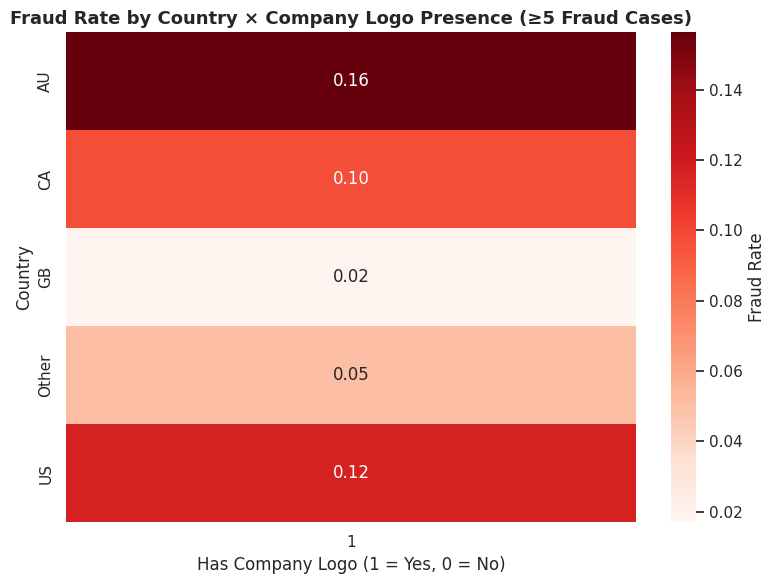

In [ ]:
logo_country = (
    df.groupby(['country_binned', 'has_logo'])['fraudulent']
    .agg(['mean', 'count', 'sum'])
    .reset_index()
    .rename(columns={'mean': 'fraud_rate', 'count': 'total_posts', 'sum': 'fraud_posts'})
)

# Keep combinations with ≥5 fraud cases
logo_country = logo_country[logo_country['fraud_posts'] >= 5]

pivot = logo_country.pivot(index='country_binned', columns='has_logo', values='fraud_rate')

plt.figure(figsize=(8,6))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt=".2f", cbar_kws={'label': 'Fraud Rate'})
plt.title("Fraud Rate by Country × Company Logo Presence (≥5 Fraud Cases)", fontsize=13, weight='bold')
plt.xlabel("Has Company Logo (1 = Yes, 0 = No)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


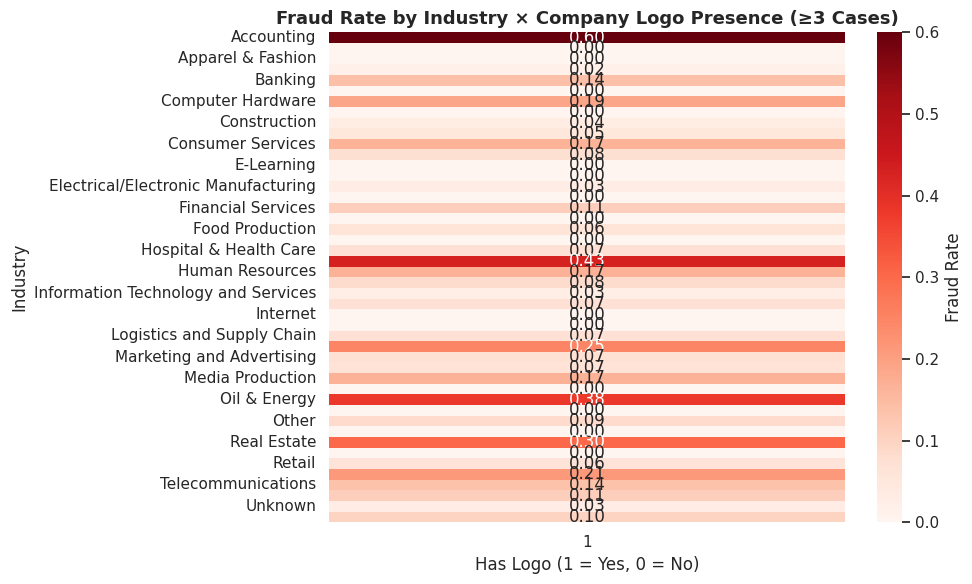

In [ ]:
logo_industry = (
    df.groupby(['industry_binned', 'has_logo'])['fraudulent']
    .agg(['mean', 'count', 'sum'])
    .reset_index()
    .rename(columns={'mean': 'fraud_rate', 'count': 'total_posts', 'sum': 'fraud_posts'})
)

# filter only combinations with at least 3 total job posts
logo_industry = logo_industry[logo_industry['total_posts'] >= 3]

pivot = logo_industry.pivot(index='industry_binned', columns='has_logo', values='fraud_rate')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt=".2f", cbar_kws={'label': 'Fraud Rate'})
plt.title("Fraud Rate by Industry x Company Logo Presence (≥3 Cases)", fontsize=13, weight='bold')
plt.xlabel("Has Logo (1 = Yes, 0 = No)")
plt.ylabel("Industry")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
